<!-- Example for now -->
<!-- zelig's code -->
<div style="text-align: center;">
    <h1>Strategies and Key Factors on Popularly Top Rated Movies: Top IMDB Rated Movies Analysis</h1>
    <h2>Final Project Statistics and Probability</h2>
    <ul style="list-style-type: none;">
        <li>Kelompok 2</li>
        <li>1. Clarissa Aydin Rahmaze - 5027241014</li>
        <li>2. Kaisar Hanif Pratama - 5027241029</li>
        <li>3. Jonathan Zelig Sutopo - 5027241047</li>
        <li>4. Muhammad Khairul Yahya - 5027241092 -</li>
    </ul>
</div>

<!-- zelig's -->
# A. Importing Dataset

<!-- zelig's -->
Importing the libraries needed overall.

In [48]:
# zelig's
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset and printing it out raw.

In [49]:
# zelig's
# import the library that can access the user's system
import os

# Get the current working directory
current_working_directory = os.getcwd()

# Define the relative path to the dataset
relative_path_to_dataset = 'data/imdb_top_1000.csv'

# Combine the current working directory with the relative path
full_path_to_dataset = os.path.join(current_working_directory, relative_path_to_dataset)

# Load the dataset into a pandas DataFrame
data = pd.read_csv(full_path_to_dataset)

# Print the first few rows of the dataset
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


<!-- zelig's -->
# B. Initial Dataset
Below shall be shown the initial/raw dataset that is yet gone through any processing.

<!-- zelig's -->
Here's a function to print out the dataset with a somewhat better format.

In [50]:
# zelig's
# function on how to print the dataset
def show_df(df, row = 5):
    print(df.head(row), "\n")
    rows, columns = df.shape
    print (f"Amount of rows: {rows}")
    print (f"Amount of columns: {columns}")
    print(f"Columns/categories: {df.columns.tolist()}")
    print(f"Conclusion: the dataset has {rows} rows/movies and {columns} columns/cataegories.")

<!-- zelig's -->
Print out initial/raw dataset with a better format.

In [51]:
# zelig's
# call out the function
show_df(data)

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

<!-- zelig's -->
From the above we could see that there are 16 columns, containing their own data value, which are: 
1. Series_Title
2. Relesed_Year
3. Certificate
4. Runtime
5. Genre
6. Subgenre
7. Subgenre 1
8. IMDB_Rating 
9. Meta_score
10. Director
11. Star1
12. Star2
13. Star3
14. Star4
15. No_of_Votes
16. Gross

<!-- zelig's -->
# C. Pre-processing Dataset
For a proper analysis, we need to assure the dataset we have is already proper and have no misses, i.e. there's no null values in them that means it's just an empty row of data with no actual value contained in them. By filtering out the null values in the dataset, we can assure the dataset we have now is proper and of good material for an analysis. By doing this, we have avoided the risk of having an more inaccurate analysis of a dataset, since null values tend to disrupt the actual value the dataset has, and can change the result of counting we do in an analysis. 

**Note: null values are considered empty based on context. Depending on the context of the data, null values can just mean 0 and not empty.**

<!-- zelig's -->
Below is the process of filtering out the dataset from null/empty values.

In [52]:
# zelig's
# Function to check each column for null values, zero values, and non-numeric values
def check_columns(df):
    for column in df.columns:
        print(f"Checking column: {column}")
        
        # Check for null values
        null_count = df[column].isnull().sum()
        print(f" - Null values: {null_count}")
        
        # Check for zero values (only for numeric columns)
        if pd.api.types.is_numeric_dtype(df[column]):
            zero_count = (df[column] == 0).sum()
            print(f" - Zero values: {zero_count}")
        else:
            print(" - Zero values: Not applicable (non-numeric column)")
        
        # Check for non-numeric values (only for columns that should be numeric)
        if column in ['Gross', 'IMDB_Rating', 'Meta_score', 'No_of_Votes']:
            non_numeric_count = pd.to_numeric(df[column], errors='coerce').isnull().sum()
            print(f" - Non-numeric values: {non_numeric_count}")
        
        print()

# Run the function to check each column
check_columns(data)

Checking column: Poster_Link
 - Null values: 0
 - Zero values: Not applicable (non-numeric column)

Checking column: Series_Title
 - Null values: 0
 - Zero values: Not applicable (non-numeric column)

Checking column: Released_Year
 - Null values: 0
 - Zero values: Not applicable (non-numeric column)

Checking column: Certificate
 - Null values: 101
 - Zero values: Not applicable (non-numeric column)

Checking column: Runtime
 - Null values: 0
 - Zero values: Not applicable (non-numeric column)

Checking column: Genre
 - Null values: 0
 - Zero values: Not applicable (non-numeric column)

Checking column: IMDB_Rating
 - Null values: 0
 - Zero values: 0
 - Non-numeric values: 0

Checking column: Overview
 - Null values: 0
 - Zero values: Not applicable (non-numeric column)

Checking column: Meta_score
 - Null values: 157
 - Zero values: 0
 - Non-numeric values: 157

Checking column: Director
 - Null values: 0
 - Zero values: Not applicable (non-numeric column)

Checking column: Star1
 - 

Since we can't analyze any data from the Poster link and overview, we can filter them out. Meanwhile, we can seperate certificates, meta scores, and gross data since they contain null values.

In [53]:
# zelig's
# Drop the 'Poster_Link' and 'Overview' columns
filtered_data = data.drop(columns=['Poster_Link', 'Overview', 'Certificate', 'Meta_score', 'Gross'])

# print out the amount of rows in the filtered dataset
print(f"Amount of rows in the filtered dataset: {filtered_data.shape[0]}")

# Since gross data type value isn't proper to be used, we'll change the directory pathing to another dataset that has the original value without formatting
# Define the relative path to the dataset
relative_path_to_dataset = 'data/movies_data.csv'
full_path_to_dataset = os.path.join(current_working_directory, relative_path_to_dataset)

# Load the dataset into a pandas DataFrame
gross_data = pd.read_csv(full_path_to_dataset)
gross_data = gross_data['Gross']

# Below is the seperated columns from the dataset
certificate_data = data['Certificate']
meta_score_data = data['Meta_score']

# Drop the null values from the seperated columns
gross_data = gross_data.dropna()
certificate_data = certificate_data.dropna()
meta_score_data = meta_score_data.dropna()

# print out the amount of rows in the seperated columns
print(f"Amount of rows in the Gross column: {gross_data.shape[0]}")
print(f"Amount of rows in the Certificate column: {certificate_data.shape[0]}")
print(f"Amount of rows in the Meta_score column: {meta_score_data.shape[0]}")

Amount of rows in the filtered dataset: 1000
Amount of rows in the Gross column: 831
Amount of rows in the Certificate column: 899
Amount of rows in the Meta_score column: 843


In [54]:
# zelig's
# print out all of the datasets
show_df(filtered_data)
print('\n')
print(gross_data, '\n')
print(certificate_data, '\n')
print(meta_score_data, '\n')

               Series_Title Released_Year  Runtime                 Genre  \
0  The Shawshank Redemption          1994  142 min                 Drama   
1             The Godfather          1972  175 min          Crime, Drama   
2           The Dark Knight          2008  152 min  Action, Crime, Drama   
3    The Godfather: Part II          1974  202 min          Crime, Drama   
4              12 Angry Men          1957   96 min          Crime, Drama   

   IMDB_Rating              Director           Star1           Star2  \
0          9.3        Frank Darabont     Tim Robbins  Morgan Freeman   
1          9.2  Francis Ford Coppola   Marlon Brando       Al Pacino   
2          9.0     Christopher Nolan  Christian Bale    Heath Ledger   
3          9.0  Francis Ford Coppola       Al Pacino  Robert De Niro   
4          9.0          Sidney Lumet     Henry Fonda     Lee J. Cobb   

           Star3           Star4  No_of_Votes  
0     Bob Gunton  William Sadler      2343110  
1     James Ca

<!-- zelig's -->
# D. Data Distribution Analysis
Below shall be where the process of analyzing the data distribution will start.

<!-- zelig's -->
## 1. Formulas Needed for Analyzing
To analyze the dataset from the distribution perspective, we will use several statistical formulas and theories. Below are the list of those formulas.

### a. Sturgess Rule
The Sturgess rule can be used to determine the number of classes there are in a dataset. 

$$
k = 1 + 3.3*log_10(n) 
$$
- $k$ : The Sturgess Value
- $n$ : The amount of data in a dataset

### b. Mean
The mean (average) of a dataset is given by the formula:

$$
\bar{x} = \frac{\sum_{i=1}^{n}{f_{i}x_{i}}}{n}
$$
- $\bar{x}$ : Mean
- $\sum_{i=1}^{n}{f_{i}x_{i}}$ : The sum of frequency*middle point
- $n$ : The amount of data in dataset

### c. Median
The median of a dataset is given by the formula: 

$$ 
Me = L + (\frac{\frac{n}{2} - c}{f})*h
$$
- $Me$ : Median
- $L$ : Lower boundary of the median class
- $c$ : Cumulative frequency up to the class before the median class.
- $f$ : Frequency of the median class
- $h$ : Class interval width

### d. Mode
The mode of a dataset is given by the formula: 

$$
Mo = L + (\frac{f_m - f_1}{(f_m - f_1)+(f_m - f_2)})*h
$$
- $Mo$ : Mode
- $L$ : Lower boundary of the mode class
- $f_m$ : Frequency of the mode class
- $f_1$ : Frequency of the class before the mode class
- $f_2$ : Frequency of the class after the mode class
- $h$ : Class interval width

### e. Mean Deviation
Mean diviation here is good to measure the average deviation of all data points from the mean, disregarding direction. Here is the formula: 

$$
MD = \frac{\sum_{i = 1}^n f_i|x_i - \bar{x}|}{n}
$$
- $MD$ : Mean Deviation
- $n$ : The amount of data in the dataset
- $f_i$ : The frequency of the class in the dataset
- $x_i$ : The middle point of the class in the dataset
- $\bar{x}$ : The mean/average of the data 

### f. Standar Deviation and Variance
Since the dataset we're analyzing counts as a **sample** (Top 1000 IMDB Movies Rating) instead of a population (all the movies worldwide), we're gonna be using the formula for sample datasets:

$$
\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} f_i(x_i - \bar{x})^2} 
$$
- $\sigma$ : Standar Deviation
- $\sigma^2$ : Variance
- $n$ : The amount of data in the dataset
- $f_i$ : The frequency of the class in the dataset
- $x_i$ : The middle point of the class in the dataset
- $\bar{x}$ : The mean/average of the data 

<!-- zelig's -->
## 2. Analysis
First of all we need to check what distribution of the data the we can check form the dataset. Hence, below is a list of all of the distribution that we will analyze from the dataset:

a. Distribution of the IMDB_Rating relative to its frequency

b. Distribution of the Meta_Score relative to its frequency

c. Distribution of Directors relative to the frequency of them directing Top Movies

d. Distribution of Artists relative to the frequency of them casting for Top Movies

e. Distribution of Certificates relative to the frequency of them showing in Top Movies 

f. Distribution of the Number_of_Votes relative to its frequency

g. Distribution of the Gross relative to its frequency


<!-- zelig's -->
### a. Distribution of the IMDB_Rating relative to its frequency

In [55]:
# zelig's
#using the sturgess rule to determine the number of classes for the distribution table
def sturgess_rule(data):
    n = data.shape[0]
    k = 1 + 3.3 * np.log10(n)
    k = int(np.ceil(k))
    return k

# Calculate the number of bins using Sturges' rule
number_of_classes = sturgess_rule(filtered_data)

# Calculate the range of the IMDB_Rating column
IMDB_data_range = filtered_data['IMDB_Rating'].max() - filtered_data['IMDB_Rating'].min()

# Calculate the bin width
IMDB_bin_width = IMDB_data_range / number_of_classes

# Create the bins for the IMDB_Rating column with consistent width
IMDB_bins = np.arange(filtered_data['IMDB_Rating'].min(), filtered_data['IMDB_Rating'].max() + IMDB_bin_width, IMDB_bin_width)

# Adjust the last bin to include the maximum value
IMDB_bins[-1] = filtered_data['IMDB_Rating'].max()

# Categorize the IMDB_Rating values into the specified bins
IMDB_distribution_table = pd.cut(filtered_data['IMDB_Rating'], bins=IMDB_bins, include_lowest=True, right=True)

# Calculate the frequency of each bin
IMDB_frequency = IMDB_distribution_table.value_counts().sort_index()

# Calculate the middle points of the class intervals
IMDB_middle_points = [(interval.left + interval.right) / 2 for interval in IMDB_frequency.index]

# Calculate the middle point times the frequency
IMDB_mp_times_freq = [mp * freq for mp, freq in zip(IMDB_middle_points, IMDB_frequency)]

# Create a DataFrame for the distribution table
IMDB_distribution_df = pd.DataFrame({
    'Class Interval': IMDB_frequency.index,
    'Middle Point (MP)': IMDB_middle_points,
    'Frequency (F)': IMDB_frequency.values,
    'MP * F': IMDB_mp_times_freq
})

# Print the distribution table
print(IMDB_distribution_df)

                Class Interval  Middle Point (MP)  Frequency (F)     MP * F
0   (7.598999999999999, 7.755]             7.6770            280  2149.5600
1               (7.755, 7.909]             7.8320            257  2012.8240
2               (7.909, 8.064]             7.9865            141  1126.0965
3               (8.064, 8.218]             8.1410            194  1579.3540
4               (8.218, 8.373]             8.2955             44   365.0020
5               (8.373, 8.527]             8.4500             51   430.9500
6               (8.527, 8.682]             8.6045             15   129.0675
7               (8.682, 8.836]             8.7590             10    87.5900
8               (8.836, 8.991]             8.9135              3    26.7405
9               (8.991, 9.145]             9.0680              3    27.2040
10                (9.145, 9.3]             9.2225              2    18.4450


<!-- zelig's -->
From the distribution table above we can finally calculate the mean, mode, and median of the data to develop the data analysis better, into the grouped data distribution analysis.

In [56]:
# zelig's
# Counting the mean, median, and mode of the IMDB_Rating column

# Calculate the mean of the IMDB_Rating column
IMDB_mean = IMDB_distribution_df['MP * F'].sum() / IMDB_distribution_df['Frequency (F)'].sum()
print(f"Mean: {IMDB_mean}")

# Calculate the median of the IMDB_Rating column
n = IMDB_distribution_df['Frequency (F)'].sum()
cumulative_frequency = IMDB_distribution_df['Frequency (F)'].cumsum()
median_class_index = cumulative_frequency.searchsorted(n / 2, side='right')
L = IMDB_distribution_df['Class Interval'][median_class_index].left - 0.5
c = cumulative_frequency[median_class_index - 1] if median_class_index > 0 else 0
f = IMDB_distribution_df['Frequency (F)'][median_class_index]
h = IMDB_bin_width
IMDB_median = L + (((n / 2 )- c) / f) * h
print(f"Median: {IMDB_median}")

# Calculate the mode of the IMDB_Rating column
mode_class_index = IMDB_distribution_df['Frequency (F)'].idxmax()
L = IMDB_distribution_df['Class Interval'][mode_class_index].left - 0.5
f_m = IMDB_distribution_df['Frequency (F)'][mode_class_index]
f_1 = IMDB_distribution_df['Frequency (F)'][mode_class_index - 1] if mode_class_index > 0 else 0
f_2 = IMDB_distribution_df['Frequency (F)'][mode_class_index + 1] if mode_class_index < len(IMDB_distribution_df) - 1 else 0
IMDB_mode = L + ((f_m - f_1) / ((f_m - f_1) + (f_m - f_2))) * h
print(f"Mode: {IMDB_mode}")

Mean: 7.952833499999999
Median: 7.387295719844358
Mode: 7.241814281428142


<!-- zelig's -->
Now that we have the mean, median, and mode from the data, we can move on to the next step where we complete the distribution table.

In [57]:
# zelig's 
IMDB_distribution_df['F * |MP - Mean|'] = IMDB_distribution_df['Frequency (F)'] * abs(IMDB_distribution_df['Middle Point (MP)'] - IMDB_mean)
IMDB_distribution_df['F * (MP - Mean)^2'] = IMDB_distribution_df['Frequency (F)'] * ((IMDB_distribution_df['Middle Point (MP)'] - IMDB_mean) ** 2)
print(IMDB_distribution_df)

                Class Interval  Middle Point (MP)  Frequency (F)     MP * F  \
0   (7.598999999999999, 7.755]             7.6770            280  2149.5600   
1               (7.755, 7.909]             7.8320            257  2012.8240   
2               (7.909, 8.064]             7.9865            141  1126.0965   
3               (8.064, 8.218]             8.1410            194  1579.3540   
4               (8.218, 8.373]             8.2955             44   365.0020   
5               (8.373, 8.527]             8.4500             51   430.9500   
6               (8.527, 8.682]             8.6045             15   129.0675   
7               (8.682, 8.836]             8.7590             10    87.5900   
8               (8.836, 8.991]             8.9135              3    26.7405   
9               (8.991, 9.145]             9.0680              3    27.2040   
10                (9.145, 9.3]             9.2225              2    18.4450   

    F * |MP - Mean|  F * (MP - Mean)^2  
0         

<!-- zelig's -->
And then we can calculate the mean deviation, standard deviation, and the variance of the distribution table.

In [58]:
# zelig's 

# Calculate the mean deviation of the IMDB_Rating column
IMDB_mean_deviation = IMDB_distribution_df['F * |MP - Mean|'].sum() / IMDB_distribution_df['Frequency (F)'].sum()
print(f"Mean Deviation: {IMDB_mean_deviation}")

# Calculate the standard deviation of the IMDB_Rating column
IMDB_standard_deviation = np.sqrt(IMDB_distribution_df['F * (MP - Mean)^2'].sum() / IMDB_distribution_df['Frequency (F)'].sum())
print(f"Standard Deviation: {IMDB_standard_deviation}")

# Calculate the variance of the IMDB_Rating column
IMDB_variance = IMDB_standard_deviation ** 2
print(f"Variance: {IMDB_variance}")

Mean Deviation: 0.21657517899999998
Standard Deviation: 0.26916473864113416
Variance: 0.07244965652775007


<!-- zelig's -->
#### Visual Presentation
Here we can see the visual presentation of it, so we can see analyze it easier.

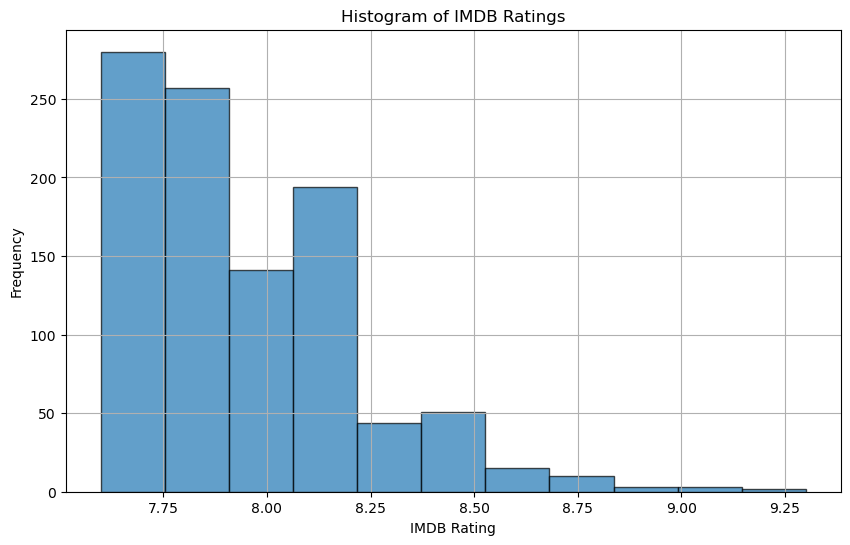

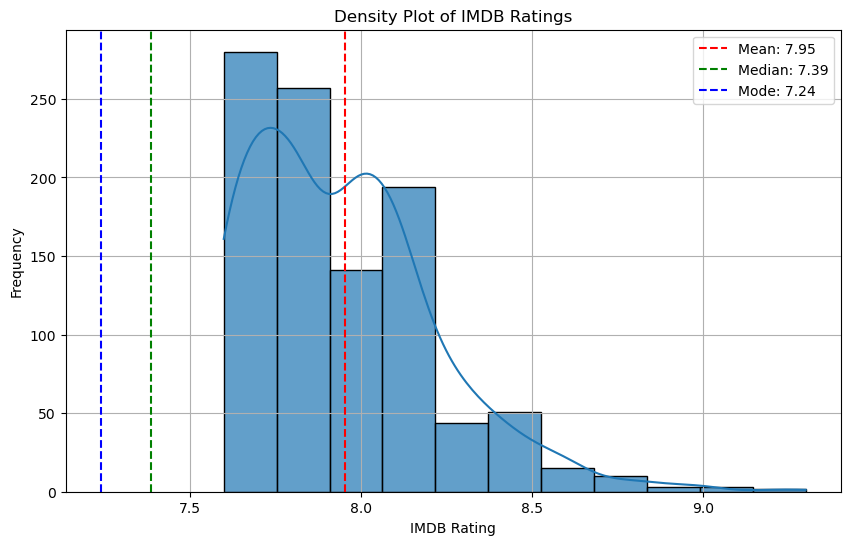

In [59]:
# zelig's
# Plot the histogram of IMDB Ratings
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['IMDB_Rating'], bins=IMDB_bins, edgecolor='black', alpha=0.7)
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.title('Histogram of IMDB Ratings')
plt.grid(True)
plt.show()

# Plot the density plot of IMDB Ratings with mean, median, and mode
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['IMDB_Rating'], bins=IMDB_bins, kde=True, edgecolor='black', alpha=0.7)
plt.axvline(IMDB_mean, color='r', linestyle='--', label=f'Mean: {IMDB_mean:.2f}')
plt.axvline(IMDB_median, color='g', linestyle='--', label=f'Median: {IMDB_median:.2f}')
plt.axvline(IMDB_mode, color='b', linestyle='--', label=f'Mode: {IMDB_mode:.2f}')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.title('Density Plot of IMDB Ratings')
plt.legend()
plt.grid(True)
plt.show()

#### Analysis
So, to sum it up: 
1. Mean: 7.952833499999999
2. Median: 7.387295719844358
3. Mode: 7.241814281428142
4. Mean Deviation: 0.21657517899999998
5. Standard Deviation: 0.26916473864113416
6. Variance: 0.07244965652775007

What we can conclude from the data that we've calculated and from the visualization presentation, is that: 
1. The **IMDB Ratings for the Top 1000 IMDB Rated Movies** are mostly **on the half higher ups of the ratings**, specifically above or equals 7.6 and lower or equals 9.3 ($7.6 \leq$ IMDB Ratings for the Top 1000 IMDB Rated Movies $\leq 9.3$).
2. As what we could see from the data visualization itself, the graph is skewed left (skewed positive). Meaning, the higher the rating goes, the more scarce the movies are. This means IMDB Ratings have a pretty high standard and pretty **accurate to determine the quality of a movie** based on the viewers' satisfaction. 
3. From the low values that mean deviation, standard deviation, and variance has, and from the visualization presentation, we could see that from the Top 1000 IMDB Rated Movies dataset on the IMDB Ratings categories, are mostly grouped up around the mean value, i.e. $\approx 7.95$. This also means the better and easier it is to analyze the trend of Top IMDB Rated Movies, since this **data is considered a good data representation** to see the trend that viewers like to watch.
4. As we can see from the mode and median of the data, that is at the back of the graph itself (from the visualization), we can conclude that all of the Top 1000 IMDB Rated Movies doesn't have any ratings that are lower than 7.6. Why is the mode and median of the dataset are out of the graph itself? It's because most of the data values from the dataset is more grouped to the 7.6 rating. Meaning, we could say that there are way many **more movies** in the Top 1000 IMDB Rated Movies that **are at the borderline of 7.6 rating**.

### b. Distribution of the Meta_Score relative to its frequency

In [60]:
# zelig's
# Calculate the range of the Meta_score column
Meta_data_range = meta_score_data.max() - meta_score_data.min()

# Calculate the bin width
Meta_bin_width = Meta_data_range / number_of_classes

# Create the bins for the Meta_score column with consistent width
Meta_bins = np.arange(meta_score_data.min(), meta_score_data.max() + Meta_bin_width, Meta_bin_width)

# Adjust the last bin to include the maximum value
Meta_bins[-1] = meta_score_data.max()

# Categorize the Meta_score values into the specified bins
Meta_distribution_table = pd.cut(meta_score_data, bins=Meta_bins, include_lowest=True, right=True)

# Calculate the frequency of each bin
Meta_frequency = Meta_distribution_table.value_counts().sort_index()

# Calculate the middle points of the class intervals
Meta_middle_points = [(interval.left + interval.right) / 2 for interval in Meta_frequency.index]

# Calculate the middle point times the frequency
Meta_mp_times_freq = [mp * freq for mp, freq in zip(Meta_middle_points, Meta_frequency)]

# Create a DataFrame for the distribution table
Meta_distribution_df = pd.DataFrame({
    'Class Interval': Meta_frequency.index,
    'Middle Point (MP)': Meta_middle_points,
    'Frequency (F)': Meta_frequency.values,
    'MP * F': Meta_mp_times_freq
})

# Print the distribution table
print(Meta_distribution_df)

      Class Interval  Middle Point (MP)  Frequency (F)      MP * F
0   (27.999, 34.545]            31.2720              3     93.8160
1   (34.545, 41.091]            37.8180              3    113.4540
2   (41.091, 47.636]            44.3635              9    399.2715
3   (47.636, 54.182]            50.9090             22   1119.9980
4   (54.182, 60.727]            57.4545             34   1953.4530
5   (60.727, 67.273]            64.0000             88   5632.0000
6   (67.273, 73.818]            70.5455            125   8818.1875
7   (73.818, 80.364]            77.0910            177  13645.1070
8   (80.364, 86.909]            83.6365            159  13298.2035
9   (86.909, 93.455]            90.1820            137  12354.9340
10   (93.455, 100.0]            96.7275             86   8318.5650


<!-- zelig's -->
From the distribution table above we can finally calculate the mean, mode, and median of the data to develop the data analysis better, into the grouped data distribution analysis.

In [61]:
# zelig's
# Counting the mean, median, and mode of the Meta_score column

# Calculate the mean of the Meta_score column
Meta_mean = Meta_distribution_df['MP * F'].sum() / Meta_distribution_df['Frequency (F)'].sum()
print(f"Mean: {Meta_mean}")

# Calculate the median of the Meta_score column
n = Meta_distribution_df['Frequency (F)'].sum()
cumulative_frequency = Meta_distribution_df['Frequency (F)'].cumsum()
median_class_index = cumulative_frequency.searchsorted(n / 2, side='right')
L = Meta_distribution_df['Class Interval'][median_class_index].left - 0.5
c = cumulative_frequency[median_class_index - 1] if median_class_index > 0 else 0
f = Meta_distribution_df['Frequency (F)'][median_class_index]
h = Meta_bin_width
Meta_median = L + (((n / 2 )- c) / f) * h
print(f"Median: {Meta_median}")

# Calculate the mode of the Meta_score column
mode_class_index = Meta_distribution_df['Frequency (F)'].idxmax()
L = Meta_distribution_df['Class Interval'][mode_class_index].left - 0.5
f_m = Meta_distribution_df['Frequency (F)'][mode_class_index]
f_1 = Meta_distribution_df['Frequency (F)'][mode_class_index - 1] if mode_class_index > 0 else 0
f_2 = Meta_distribution_df['Frequency (F)'][mode_class_index + 1] if mode_class_index < len(Meta_distribution_df) - 1 else 0
Meta_mode = L + ((f_m - f_1) / ((f_m - f_1) + (f_m - f_2))) * h
print(f"Mode: {Meta_mode}")

Mean: 77.99168386714118
Median: 78.40274576271186
Mode: 78.18033766233766


<!-- zelig's -->
Now that we have the mean, median, and mode from the data, we can move on to the next step where we complete the distribution table.

In [62]:
# zelig's 
Meta_distribution_df['F * |MP - Mean|'] = Meta_distribution_df['Frequency (F)'] * abs(Meta_distribution_df['Middle Point (MP)'] - Meta_mean)
Meta_distribution_df['F * (MP - Mean)^2'] = Meta_distribution_df['Frequency (F)'] * ((Meta_distribution_df['Middle Point (MP)'] - Meta_mean) ** 2)
print(Meta_distribution_df)

      Class Interval  Middle Point (MP)  Frequency (F)      MP * F  \
0   (27.999, 34.545]            31.2720              3     93.8160   
1   (34.545, 41.091]            37.8180              3    113.4540   
2   (41.091, 47.636]            44.3635              9    399.2715   
3   (47.636, 54.182]            50.9090             22   1119.9980   
4   (54.182, 60.727]            57.4545             34   1953.4530   
5   (60.727, 67.273]            64.0000             88   5632.0000   
6   (67.273, 73.818]            70.5455            125   8818.1875   
7   (73.818, 80.364]            77.0910            177  13645.1070   
8   (80.364, 86.909]            83.6365            159  13298.2035   
9   (86.909, 93.455]            90.1820            137  12354.9340   
10   (93.455, 100.0]            96.7275             86   8318.5650   

    F * |MP - Mean|  F * (MP - Mean)^2  
0        140.159052        6548.186582  
1        120.521052        4841.774626  
2        302.653655       10177.6927

<!-- zelig's -->
And then we can calculate the mean deviation, standard deviation, and the variance of the distribution table.

In [63]:
# zelig's 

# Calculate the mean deviation of the Meta_score column
Meta_mean_deviation = Meta_distribution_df['F * |MP - Mean|'].sum() / Meta_distribution_df['Frequency (F)'].sum()
print(f"Mean Deviation: {Meta_mean_deviation}")

# Calculate the standard deviation of the Meta_score column
Meta_standard_deviation = np.sqrt(Meta_distribution_df['F * (MP - Mean)^2'].sum() / Meta_distribution_df['Frequency (F)'].sum())
print(f"Standard Deviation: {Meta_standard_deviation}")

# Calculate the variance of the Meta_score column
Meta_variance = Meta_standard_deviation ** 2
print(f"Variance: {Meta_variance}")

Mean Deviation: 9.914304300716669
Standard Deviation: 12.51144021472902
Variance: 156.53613624673855


<!-- zelig's -->
#### Visual Presentation
Here we can see the visual presentation of it, so we can see analyze it easier.

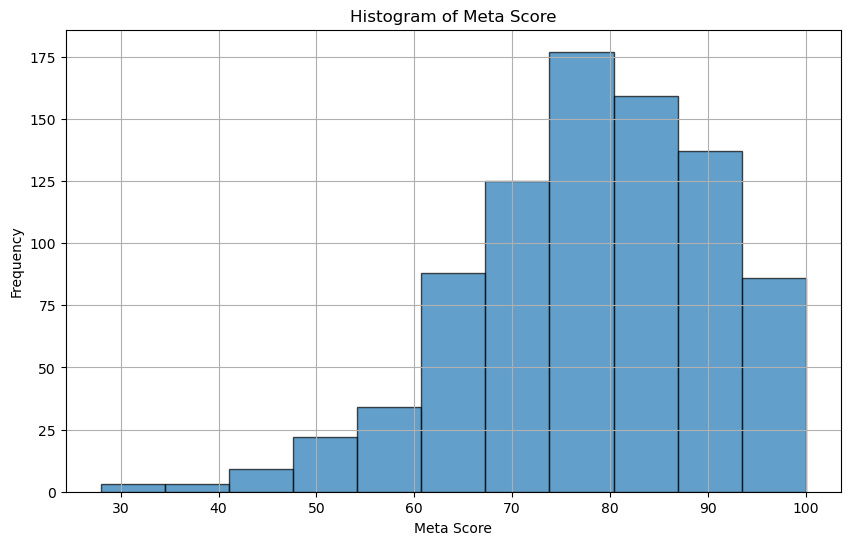

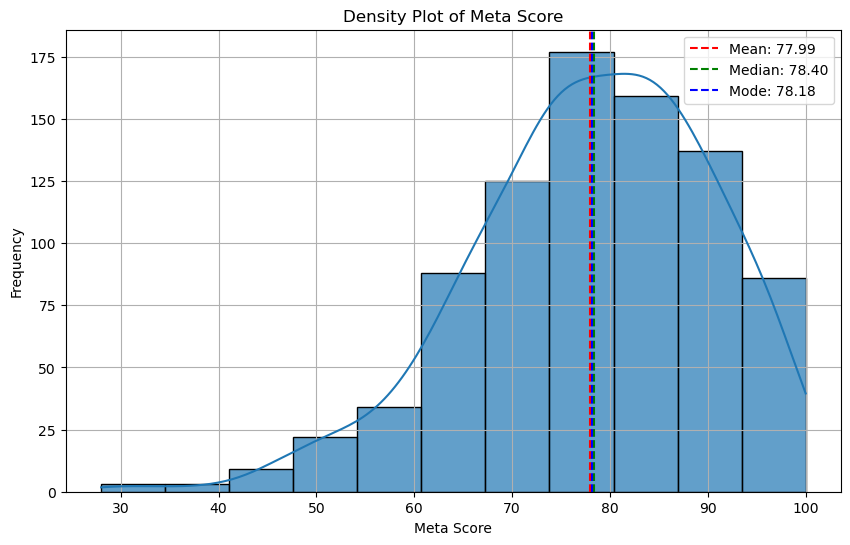

In [64]:
# zelig's
# Plot the histogram of Meta Score
plt.figure(figsize=(10, 6))
plt.hist(meta_score_data, bins=Meta_bins, edgecolor='black', alpha=0.7)
plt.xlabel('Meta Score')
plt.ylabel('Frequency')
plt.title('Histogram of Meta Score')
plt.grid(True)
plt.show()

# Plot the density plot of Meta Score with mean, median, and mode
plt.figure(figsize=(10, 6))
sns.histplot(meta_score_data, bins=Meta_bins, kde=True, edgecolor='black', alpha=0.7)
plt.axvline(Meta_mean, color='r', linestyle='--', label=f'Mean: {Meta_mean:.2f}')
plt.axvline(Meta_median, color='g', linestyle='--', label=f'Median: {Meta_median:.2f}')
plt.axvline(Meta_mode, color='b', linestyle='--', label=f'Mode: {Meta_mode:.2f}')
plt.xlabel('Meta Score')
plt.ylabel('Frequency')
plt.title('Density Plot of Meta Score')
plt.legend()
plt.grid(True)
plt.show()

#### Analysis
So, to sum it up: 
1. Mean: 77.99168386714118
2. Median: 78.40274576271186
3. Mode: 78.18033766233766
4. Mean Deviation: 9.914304300716669
5. Standard Deviation: 12.51144021472902
6. Variance: 156.53613624673855

What we can conclude from the data that we've calculated and from the visualization presentation, is that: 
1. The **Meta Score for the Top 1000 IMDB Rated Movies are evenly distributed**, meaning its data values has a lot of variance. But, we could see from the graph itself it is skewed left (skewed negative), meaning it has scarce meta scores that are on the low end. This means within the Top 1000 IMDB Rated Movies, the meta scores are still mostly on the upper half of meta scores.
2. As what we could see from the data visualization itself, the graph is skewed left (skewed negative). But we could also see that the data are evenly distributed to the right and left (from the mean, median, and mode location, and the shape of the graph), meaning this graph is similar to a symmetric graph but slightly shifted to the right. This means, even though these movies are the Top 1000 IMDB Rated Movies, their **meta scores doesn't fully agree with that**. But, it also doesn't mean that the meta scores fully disagree with it, since most of the meta scores data are on the higher half of the ratings, and even reached the full marks.
3. From the high values that mean deviation, standard deviation, and variance has, and from the visualization presentation, we could see that from the Top 1000 IMDB Rated Movies dataset on the Meta Score categories, are very distributed to the whole graph, form the center to the right and left. This also means this **data is an only ever so slightly good data representation** to determine the trend the Top 1000 IMDB Rated Movies, just for the fact that the graph is shifted more to the right.

### c. Distribution of Directors relative to the frequency of them directing Top Movies

In [65]:
# zelig's
# Count the frequency of each director
director_frequency = data['Director'].value_counts()

# Create a DataFrame for the frequency table
director_frequency_df = director_frequency.reset_index()
director_frequency_df.columns = ['Director', 'Frequency']

# Print the frequency table
print(director_frequency_df)

             Director  Frequency
0    Alfred Hitchcock         14
1    Steven Spielberg         13
2      Hayao Miyazaki         11
3     Martin Scorsese         10
4      Akira Kurosawa         10
..                ...        ...
543    Neill Blomkamp          1
544   Tomas Alfredson          1
545      Duncan Jones          1
546   Jacques Audiard          1
547    George Stevens          1

[548 rows x 2 columns]


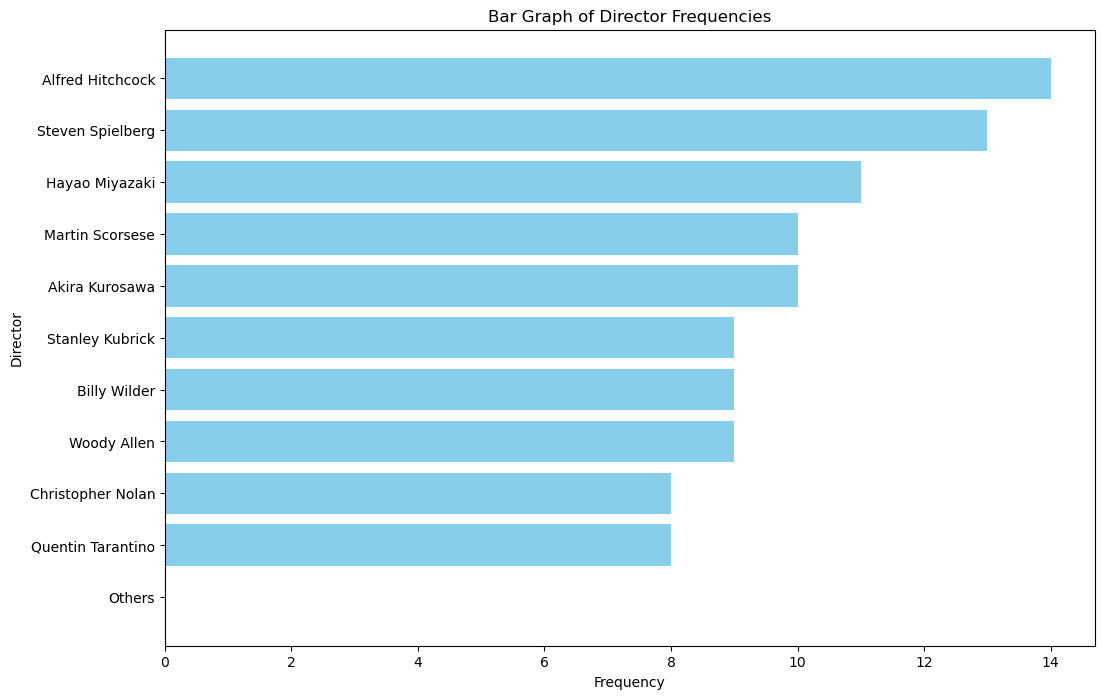

In [66]:
# zelig's 
# Sort the frequency table in ascending order
director_frequency_df = director_frequency_df.sort_values(by='Frequency', ascending=False)

# Limit the number of directors shown on the graph
top_n = 10  # Number of directors to show
top_directors = director_frequency_df.head(top_n)

# Add a single "Others" category without summing their frequencies
others = pd.DataFrame([{'Director': 'Others', 'Frequency': 0}])
limited_directors_df = pd.concat([top_directors, others], ignore_index=True)

# Plot the bar graph of director frequencies
plt.figure(figsize=(12, 8))
plt.barh(limited_directors_df['Director'], limited_directors_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Director')
plt.title('Bar Graph of Director Frequencies')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()

#### Analysis
From the frequency table and the bar diagram above, we could see the most frequent directors that directs Top IMDB Rated Movies. From here, we can tell that a director's skill also matter when it comes to the quality of a movie and how well it can satisfy their viewers.

### d. Distribution of Artists relative to the frequency of them casting for Top Movies

In [67]:
# zelig's
# Combine the values from the Star1, Star2, Star3, and Star4 columns into a single series
all_artists = pd.concat([data['Star1'], data['Star2'], data['Star3'], data['Star4']])

# Count the frequency of each artist
artist_frequency = all_artists.value_counts()

# Create a DataFrame for the frequency table
artist_frequency_df = artist_frequency.reset_index()
artist_frequency_df.columns = ['Artist', 'Frequency']

# Print the frequency table
print(artist_frequency_df)

                Artist  Frequency
0       Robert De Niro         17
1            Tom Hanks         14
2            Al Pacino         13
3       Clint Eastwood         12
4            Brad Pitt         12
...                ...        ...
2704  Christian Berkel          1
2705    Tyler Hoechlin          1
2706        Katrin Saß          1
2707     Dorothy Duffy          1
2708    Godfrey Tearle          1

[2709 rows x 2 columns]


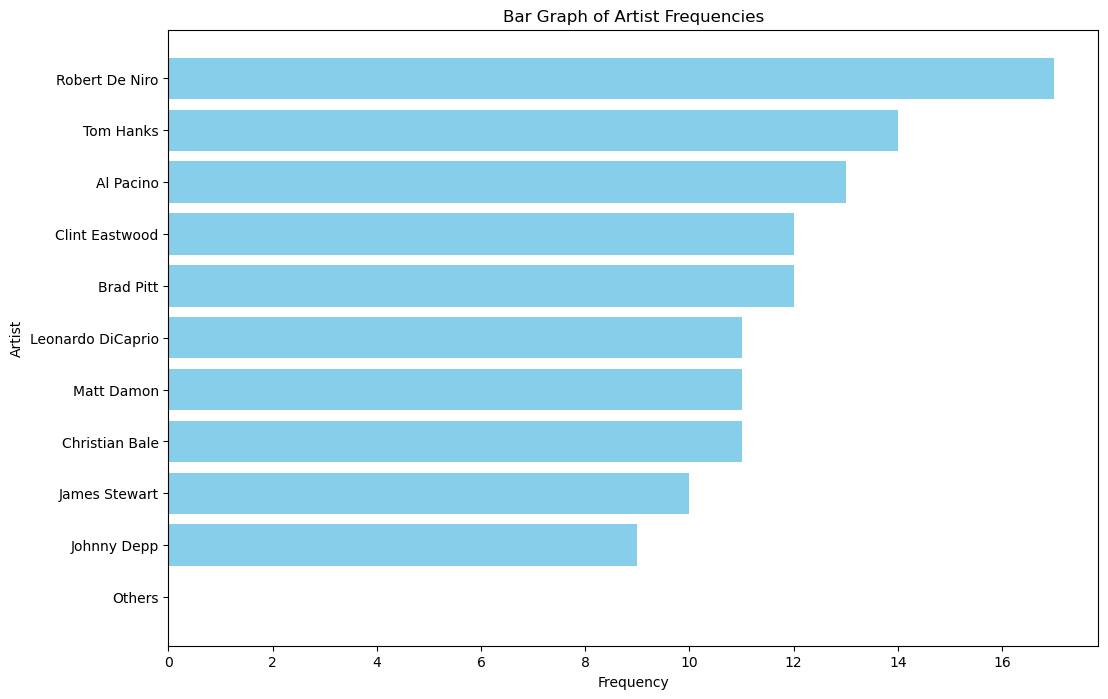

In [68]:
# zelig's
# Sort the frequency table in descending order
artist_frequency_df = artist_frequency_df.sort_values(by='Frequency', ascending=False)

# Limit the number of artists shown on the graph
top_n = 10  # Number of artists to show
top_artists = artist_frequency_df.head(top_n)

# Add a single "Others" category without summing their frequencies
others = pd.DataFrame([{'Artist': 'Others', 'Frequency': 0}])
limited_artists_df = pd.concat([top_artists, others], ignore_index=True)

# Plot the bar graph of artist frequencies
plt.figure(figsize=(12, 8))
plt.barh(limited_artists_df['Artist'], limited_artists_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Artist')
plt.title('Bar Graph of Artist Frequencies')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()

#### Analysis
From the frequency table and the bar diagram above, we could see the most frequent artists that casts for Top IMDB Rated Movies. From here, we can tell that an actor can also make an impact on the viewers satisfaction of a movie.

### e. Distribution of Certificates relative to the frequency of them showing in Top Movies 

In [69]:
# zelig's 
# Count the frequency of each certificate
certificate_frequency = data['Certificate'].value_counts()

# Create a DataFrame for the frequency table
certificate_frequency_df = certificate_frequency.reset_index()
certificate_frequency_df.columns = ['Certificate', 'Frequency']

# Print the frequency table
print(certificate_frequency_df)

   Certificate  Frequency
0            U        234
1            A        197
2           UA        175
3            R        146
4        PG-13         43
5           PG         37
6       Passed         34
7            G         12
8     Approved         11
9        TV-PG          3
10          GP          2
11       TV-14          1
12          16          1
13       TV-MA          1
14     Unrated          1
15         U/A          1


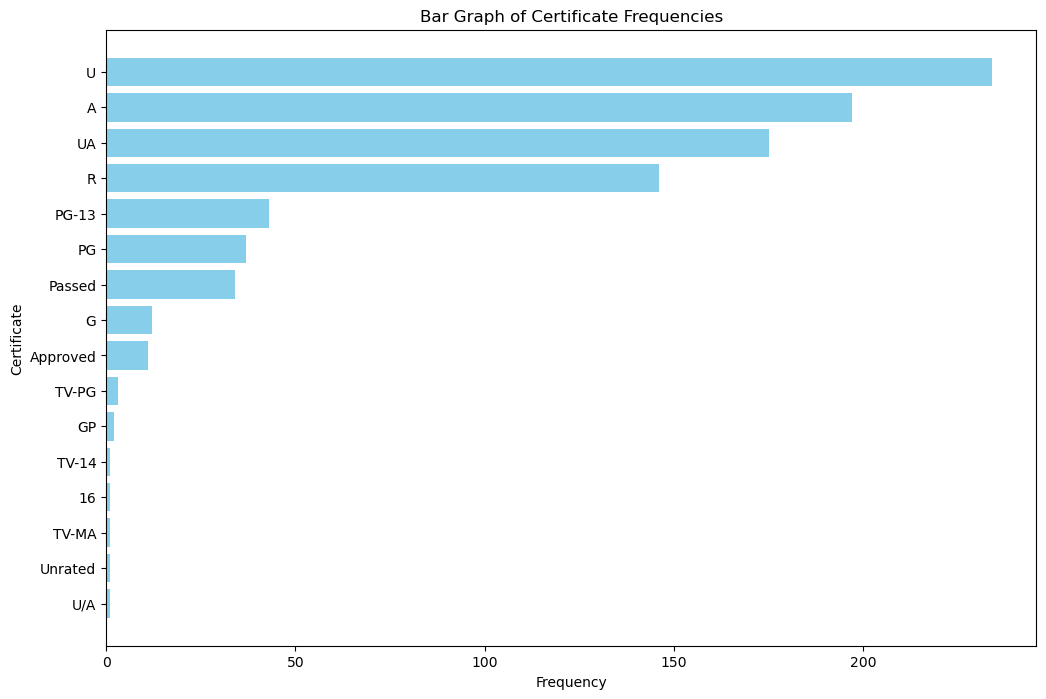

In [70]:
# zelig's 
# Sort the frequency table in descending order
certificate_frequency_df = certificate_frequency_df.sort_values(by='Frequency', ascending=False)

# Plot the bar graph of certificate frequencies
plt.figure(figsize=(12, 8))
plt.barh(certificate_frequency_df['Certificate'], certificate_frequency_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Certificate')
plt.title('Bar Graph of Certificate Frequencies')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()

#### Analysis
From the frequency table and the bar diagram above, we could see the most frequent certificates that a movie has for Top IMDB Rated Movies. From here, we can tell what kind of movies are usually in the Top IMDB Rated Movies and what kind of movies viewers likes to watch.

### f. Distribution of the Number_of_Votes relative to its frequency

In [71]:
# zelig's
# Calculate the range of the No_of_Votes column
Votes_data_range = filtered_data['No_of_Votes'].max() - filtered_data['No_of_Votes'].min()

# Calculate the bin width
Votes_bin_width = Votes_data_range / number_of_classes

# Create the bins for the No_of_Votes column with consistent width
Votes_bins = np.arange(filtered_data['No_of_Votes'].min(), filtered_data['No_of_Votes'].max() + Votes_bin_width, Votes_bin_width)

# Adjust the last bin to include the maximum value
Votes_bins[-1] = data['No_of_Votes'].max()

# Categorize the No_of_Votes values into the specified bins
Votes_distribution_table = pd.cut(filtered_data['No_of_Votes'], bins=Votes_bins, include_lowest=True, right=True)

# Calculate the frequency of each bin
Votes_frequency = Votes_distribution_table.value_counts().sort_index()

# Calculate the middle points of the class intervals
Votes_middle_points = [(interval.left + interval.right) / 2 for interval in Votes_frequency.index]

# Calculate the middle point times the frequency
Votes_mp_times_freq = [mp * freq for mp, freq in zip(Votes_middle_points, Votes_frequency)]

# Create a DataFrame for the distribution table
Votes_distribution_df = pd.DataFrame({
    'Class Interval': Votes_frequency.index,
    'Middle Point (MP)': Votes_middle_points,
    'Frequency (F)': Votes_frequency.values,
    'MP * F': Votes_mp_times_freq
})

# Print the distribution table
print(Votes_distribution_df)

                Class Interval  Middle Point (MP)  Frequency (F)        MP * F
0      (25087.999, 235817.273]       1.304526e+05            637  8.309833e+07
1     (235817.273, 446546.545]       3.411819e+05            155  5.288320e+07
2     (446546.545, 657275.818]       5.519112e+05             95  5.243156e+07
3     (657275.818, 868005.091]       7.626405e+05             51  3.889466e+07
4    (868005.091, 1078734.364]       9.733697e+05             30  2.920109e+07
5   (1078734.364, 1289463.636]       1.184099e+06             15  1.776148e+07
6   (1289463.636, 1500192.909]       1.394828e+06              5  6.974141e+06
7   (1500192.909, 1710922.182]       1.605558e+06              6  9.633345e+06
8   (1710922.182, 1921651.455]       1.816287e+06              3  5.448860e+06
9   (1921651.455, 2132380.727]       2.027016e+06              1  2.027016e+06
10    (2132380.727, 2343110.0]       2.237745e+06              2  4.475491e+06


<!-- zelig's -->
From the distribution table above we can finally calculate the mean, mode, and median of the data to develop the data analysis better, into the grouped data distribution analysis.

In [72]:
# zelig's
# Counting the mean, median, and mode of the No_of_Votes column

# Calculate the mean of the No_of_Votes column
Votes_mean = Votes_distribution_df['MP * F'].sum() / Votes_distribution_df['Frequency (F)'].sum()
print(f"Mean: {Votes_mean}")

# Calculate the median of the No_of_Votes column
n = Votes_distribution_df['Frequency (F)'].sum()
cumulative_frequency = Votes_distribution_df['Frequency (F)'].cumsum()
median_class_index = cumulative_frequency.searchsorted(n / 2, side='right')
L = Votes_distribution_df['Class Interval'][median_class_index].left - 0.5
c = cumulative_frequency[median_class_index - 1] if median_class_index > 0 else 0
f = Votes_distribution_df['Frequency (F)'][median_class_index]
h = Votes_bin_width
Votes_median = L + (((n / 2 )- c) / f) * h
print(f"Median: {Votes_median}")

# Calculate the mode of the No_of_Votes column
mode_class_index = Votes_distribution_df['Frequency (F)'].idxmax()
L = Votes_distribution_df['Class Interval'][mode_class_index].left - 0.5
f_m = Votes_distribution_df['Frequency (F)'][mode_class_index]
f_1 = Votes_distribution_df['Frequency (F)'][mode_class_index - 1] if mode_class_index > 0 else 0
f_2 = Votes_distribution_df['Frequency (F)'][mode_class_index + 1] if mode_class_index < len(Votes_distribution_df) - 1 else 0
Votes_mode = L + ((f_m - f_1) / ((f_m - f_1) + (f_m - f_2))) * h
print(f"Mode: {Votes_mode}")

Mean: 302829.18118300004
Median: 190495.09140759244
Mode: 145046.87945332684


<!-- zelig's -->
Now that we have the mean, median, and mode from the data, we can move on to the next step where we complete the distribution table.

In [73]:
# zelig's 
Votes_distribution_df['F * |MP - Mean|'] = Votes_distribution_df['Frequency (F)'] * abs(Votes_distribution_df['Middle Point (MP)'] - Votes_mean)
Votes_distribution_df['F * (MP - Mean)^2'] = Votes_distribution_df['Frequency (F)'] * ((Votes_distribution_df['Middle Point (MP)'] - Votes_mean) ** 2)
print(Votes_distribution_df)

                Class Interval  Middle Point (MP)  Frequency (F)  \
0      (25087.999, 235817.273]       1.304526e+05            637   
1     (235817.273, 446546.545]       3.411819e+05            155   
2     (446546.545, 657275.818]       5.519112e+05             95   
3     (657275.818, 868005.091]       7.626405e+05             51   
4    (868005.091, 1078734.364]       9.733697e+05             30   
5   (1078734.364, 1289463.636]       1.184099e+06             15   
6   (1289463.636, 1500192.909]       1.394828e+06              5   
7   (1500192.909, 1710922.182]       1.605558e+06              6   
8   (1710922.182, 1921651.455]       1.816287e+06              3   
9   (1921651.455, 2132380.727]       2.027016e+06              1   
10    (2132380.727, 2343110.0]       2.237745e+06              2   

          MP * F  F * |MP - Mean|  F * (MP - Mean)^2  
0   8.309833e+07     1.098039e+08       1.892761e+13  
1   5.288320e+07     5.944673e+06       2.279944e+11  
2   5.243156e+07  

<!-- zelig's -->
And then we can calculate the mean deviation, standard deviation, and the variance of the distribution table.

In [74]:
# zelig's 

# Calculate the mean deviation of the No_of_Votes column
Votes_mean_deviation = Votes_distribution_df['F * |MP - Mean|'].sum() / Votes_distribution_df['Frequency (F)'].sum()
print(f"Mean Deviation: {Votes_mean_deviation}")

# Calculate the standard deviation of the No_of_Votes column
Votes_standard_deviation = np.sqrt(Votes_distribution_df['F * (MP - Mean)^2'].sum() / Votes_distribution_df['Frequency (F)'].sum())
print(f"Standard Deviation: {Votes_standard_deviation}")

# Calculate the variance of the No_of_Votes column
Votes_variance = Votes_standard_deviation ** 2
print(f"Variance: {Votes_variance}")

Mean Deviation: 219607.71856314203
Standard Deviation: 307323.62965407385
Variance: 94447813343.75435


<!-- zelig's -->
#### Visual Presentation
Here we can see the visual presentation of it, so we can see analyze it easier.

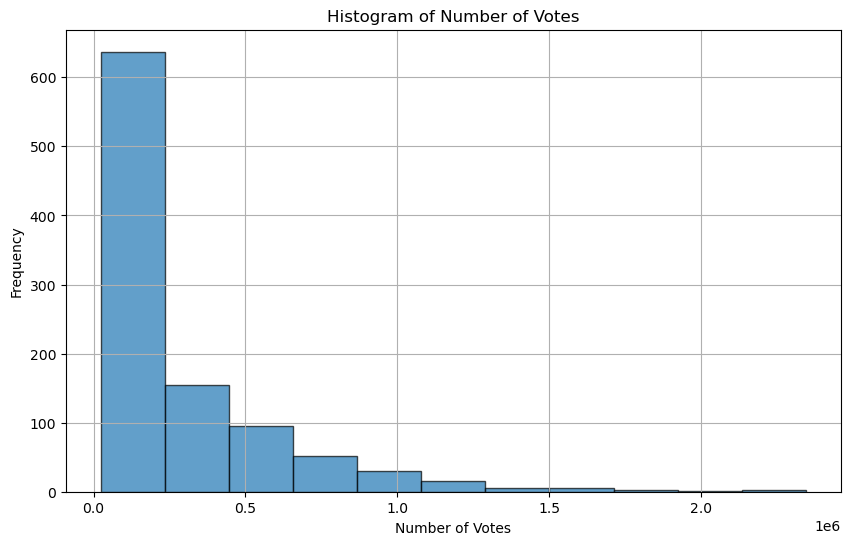

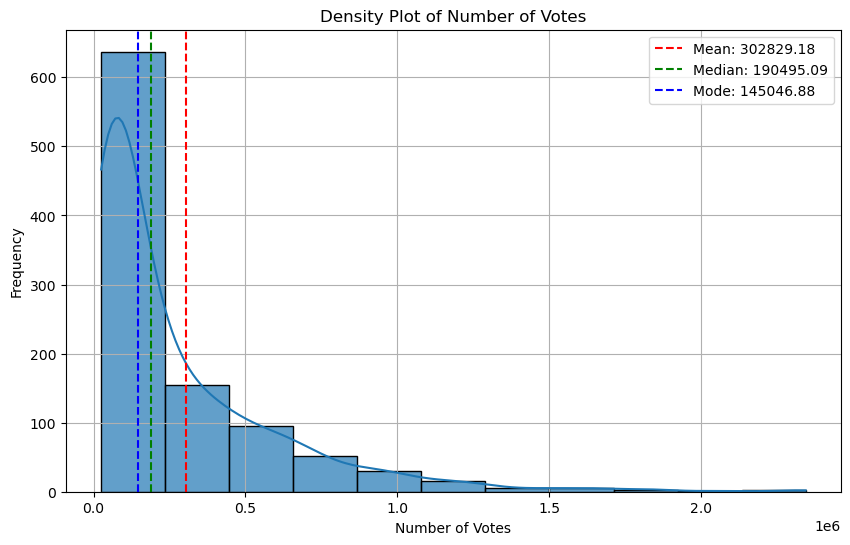

In [75]:
# zelig's
# Plot the histogram of Number of Votes
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['No_of_Votes'], bins=Votes_bins, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Votes')
plt.grid(True)
plt.show()

# Plot the density plot of Number of Votes with mean, median, and mode
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['No_of_Votes'], bins=Votes_bins, kde=True, edgecolor='black', alpha=0.7)
plt.axvline(Votes_mean, color='r', linestyle='--', label=f'Mean: {Votes_mean:.2f}')
plt.axvline(Votes_median, color='g', linestyle='--', label=f'Median: {Votes_median:.2f}')
plt.axvline(Votes_mode, color='b', linestyle='--', label=f'Mode: {Votes_mode:.2f}')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.title('Density Plot of Number of Votes')
plt.legend()
plt.grid(True)
plt.show()

#### Analysis
So, to sum it up: 
1. Mean: 302829.18118300004
2. Median: 190495.09140759244
3. Mode: 145046.87945332684
4. Mean Deviation: 219607.71856314203
5. Standard Deviation: 307323.62965407385
6. Variance: 94447813343.75435

What we can conclude from the data that we've calculated and from the visualization presentation, is that: 
1. The **Number of Votes for the Top 1000 IMDB Rated Movies are mostly on the $25,088$ votes $\leq$ Number of Votes $\leq 235,817$ votes** out of a maximum votes that reaches up to $2,343,110$ votes, meaning its data values are very skewed right (skewed positive). The data for number of votes can total up to a very high number, and $\approx 25,000 to \approx 235,000$ of votes can already be counted as a pretty good quantity of reviewers. Even though the data is supposedly on a worldwide level, the quantity itself is already pretty big, hence the credibility of this data can be held pretty credible. Though, for a supposedly worldwide level dataset, this data makes us question the credibility of it.
2. As what we could see from the data visualization itself, the graph is skewed right (skewed positive). Meaning the data is more to the low end, where it's still below 250k of votes. This also means the dataset has scarce enormous quantity of votes that could reach up to milions of votes. In conclusion, this **dataset mostly has quantity of votes from $\approx 25,000 to \approx 235,000$ of votes**
3. This dataset has a big range of variance, meaning the data is more distributed through the whole graph. But, we could see from the mean deviation and standard deviation that the **data is still pretty grouped up around the mean of data**. Meaning, the votes is really grouped up on the low end of the graph. 

### g. Distribution of the Gross relative to its frequency

In [76]:
print(gross_data)

0       28341469.0
1      134966411.0
2      534858444.0
3       57300000.0
4        4360000.0
          ...     
990       696690.0
991      1378435.0
992    141843612.0
994     13780024.0
997     30500000.0
Name: Gross, Length: 831, dtype: float64


In [77]:
# zelig's
# Calculate the range of the Gross column
Gross_data_range = gross_data.max() - gross_data.min()

# Calculate the bin width
Gross_bin_width = Gross_data_range / number_of_classes

# Create the bins for the Gross column with consistent width
Gross_bins = np.arange(gross_data.min(), gross_data.max() + Gross_bin_width, Gross_bin_width)

# Adjust the last bin to include the maximum value
Gross_bins[-1] = gross_data.max()

# Categorize the Gross values into the specified bins
Gross_distribution_table = pd.cut(gross_data, bins=Gross_bins, include_lowest=True, right=True)

# Calculate the frequency of each bin
Gross_frequency = Gross_distribution_table.value_counts().sort_index()

# Calculate the middle points of the class intervals
Gross_middle_points = [(interval.left + interval.right) / 2 for interval in Gross_frequency.index]

# Calculate the middle point times the frequency
Gross_mp_times_freq = [mp * freq for mp, freq in zip(Gross_middle_points, Gross_frequency)]

# Create a DataFrame for the distribution table
Gross_distribution_df = pd.DataFrame({
    'Class Interval': Gross_frequency.index,
    'Middle Point (MP)': Gross_middle_points,
    'Frequency (F)': Gross_frequency.values,
    'MP * F': Gross_mp_times_freq
})

# Print the distribution table
print(Gross_distribution_df)

                    Class Interval  Middle Point (MP)  Frequency (F)  \
0         (1304.999, 85152297.727]       4.257680e+07            630   
1    (85152297.727, 170303290.455]       1.277278e+08             94   
2   (170303290.455, 255454283.182]       2.128788e+08             51   
3   (255454283.182, 340605275.909]       2.980298e+08             32   
4   (340605275.909, 425756268.636]       3.831808e+08             12   
5   (425756268.636, 510907261.364]       4.683318e+08              3   
6   (510907261.364, 596058254.091]       5.534828e+08              2   
7   (596058254.091, 681209246.818]       6.386338e+08              4   
8   (681209246.818, 766360239.545]       7.237847e+08              1   
9   (766360239.545, 851511232.273]       8.089357e+08              0   
10    (851511232.273, 936662225.0]       8.940867e+08              2   

          MP * F  
0   2.682338e+10  
1   1.200641e+10  
2   1.085682e+10  
3   9.536953e+09  
4   4.598169e+09  
5   1.404995e+09  
6 

<!-- zelig's -->
From the distribution table above we can finally calculate the mean, mode, and median of the data to develop the data analysis better, into the grouped data distribution analysis.

In [78]:
# zelig's
# Counting the mean, median, and mode of the Gross column

# Calculate the mean of the Gross column
Gross_mean = Gross_distribution_df['MP * F'].sum() / Gross_distribution_df['Frequency (F)'].sum()
print(f"Mean: {Gross_mean}")

# Calculate the median of the Gross column
n = Gross_distribution_df['Frequency (F)'].sum()
cumulative_frequency = Gross_distribution_df['Frequency (F)'].cumsum()
median_class_index = cumulative_frequency.searchsorted(n / 2, side='right')
L = Gross_distribution_df['Class Interval'][median_class_index].left - 0.5
c = cumulative_frequency[median_class_index - 1] if median_class_index > 0 else 0
f = Gross_distribution_df['Frequency (F)'][median_class_index]
h = Gross_bin_width
Gross_median = L + (((n / 2 )- c) / f) * h
print(f"Median: {Gross_median}")

# Calculate the mode of the Gross column
mode_class_index = Gross_distribution_df['Frequency (F)'].idxmax()
L = Gross_distribution_df['Class Interval'][mode_class_index].left - 0.5
f_m = Gross_distribution_df['Frequency (F)'][mode_class_index]
f_1 = Gross_distribution_df['Frequency (F)'][mode_class_index - 1] if mode_class_index > 0 else 0
f_2 = Gross_distribution_df['Frequency (F)'][mode_class_index + 1] if mode_class_index < len(Gross_distribution_df) - 1 else 0
Gross_mode = L + ((f_m - f_1) / ((f_m - f_1) + (f_m - f_2))) * h
print(f"Mode: {Gross_mode}")

Mean: 85920808.49150543
Median: 56160411.60722511
Mode: 46009130.758161075


<!-- zelig's -->
Now that we have the mean, median, and mode from the data, we can move on to the next step where we complete the distribution table.

In [79]:
# zelig's 
Gross_distribution_df['F * |MP - Mean|'] = Gross_distribution_df['Frequency (F)'] * abs(Gross_distribution_df['Middle Point (MP)'] - Gross_mean)
Gross_distribution_df['F * (MP - Mean)^2'] = Gross_distribution_df['Frequency (F)'] * ((Gross_distribution_df['Middle Point (MP)'] - Gross_mean) ** 2)
print(Gross_distribution_df)

                    Class Interval  Middle Point (MP)  Frequency (F)  \
0         (1304.999, 85152297.727]       4.257680e+07            630   
1    (85152297.727, 170303290.455]       1.277278e+08             94   
2   (170303290.455, 255454283.182]       2.128788e+08             51   
3   (255454283.182, 340605275.909]       2.980298e+08             32   
4   (340605275.909, 425756268.636]       3.831808e+08             12   
5   (425756268.636, 510907261.364]       4.683318e+08              3   
6   (510907261.364, 596058254.091]       5.534828e+08              2   
7   (596058254.091, 681209246.818]       6.386338e+08              4   
8   (681209246.818, 766360239.545]       7.237847e+08              1   
9   (766360239.545, 851511232.273]       8.089357e+08              0   
10    (851511232.273, 936662225.0]       8.940867e+08              2   

          MP * F  F * |MP - Mean|  F * (MP - Mean)^2  
0   2.682338e+10     2.730672e+10       1.183583e+18  
1   1.200641e+10     3.92

<!-- zelig's -->
And then we can calculate the mean deviation, standard deviation, and the variance of the distribution table.

In [80]:
# zelig's 

# Calculate the mean deviation of the Gross column
Gross_mean_deviation = Gross_distribution_df['F * |MP - Mean|'].sum() / Gross_distribution_df['Frequency (F)'].sum()
print(f"Mean Deviation: {Gross_mean_deviation}")

# Calculate the standard deviation of the Gross column
Gross_standard_deviation = np.sqrt(Gross_distribution_df['F * (MP - Mean)^2'].sum() / Gross_distribution_df['Frequency (F)'].sum())
print(f"Standard Deviation: {Gross_standard_deviation}")

# Calculate the variance of the Gross column
Gross_variance = Gross_standard_deviation ** 2
print(f"Variance: {Gross_variance}")

Mean Deviation: 65720155.2128963
Standard Deviation: 101023675.36130686
Variance: 1.0205782983506718e+16


<!-- zelig's -->
#### Visual Presentation
Here we can see the visual presentation of it, so we can see analyze it easier.

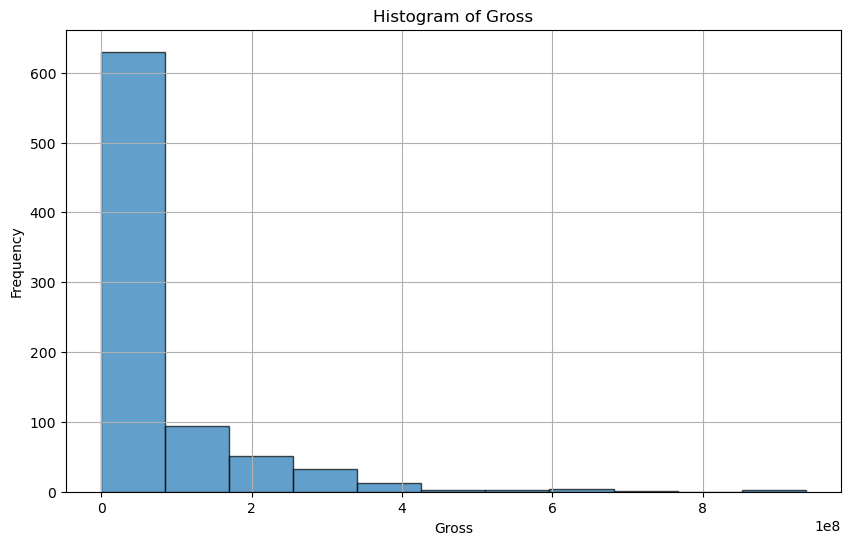

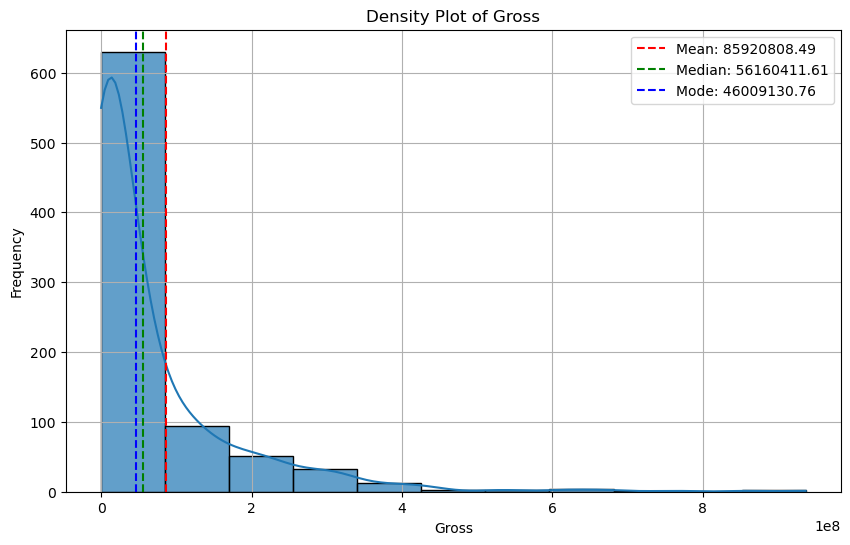

In [81]:
# zelig's
# Plot the histogram of Gross
plt.figure(figsize=(10, 6))
plt.hist(gross_data, bins=Gross_bins, edgecolor='black', alpha=0.7)
plt.xlabel('Gross')
plt.ylabel('Frequency')
plt.title('Histogram of Gross')
plt.grid(True)
plt.show()

# Plot the density plot of Gross with mean, median, and mode
plt.figure(figsize=(10, 6))
sns.histplot(gross_data, bins=Gross_bins, kde=True, edgecolor='black', alpha=0.7)
plt.axvline(Gross_mean, color='r', linestyle='--', label=f'Mean: {Gross_mean:.2f}')
plt.axvline(Gross_median, color='g', linestyle='--', label=f'Median: {Gross_median:.2f}')
plt.axvline(Gross_mode, color='b', linestyle='--', label=f'Mode: {Gross_mode:.2f}')
plt.xlabel('Gross')
plt.ylabel('Frequency')
plt.title('Density Plot of Gross')
plt.legend()
plt.grid(True)
plt.show()

#### Analysis
So, to sum it up: 
1. Mean: 85920808.49150543
2. Median: 56160411.60722511
3. Mode: 46009130.758161075
4. Mean Deviation: 65720155.2128963
5. Standard Deviation: 101023675.36130686
6. Variance: 1.0205782983506718e+16

What we can conclude from the data that we've calculated and from the visualization presentation, is that: 
1. The **Gross for the Top 1000 IMDB Rated Movies are mostly on the $1305 \leq$ Gross $\leq 85152297.727$ unit of money**. Mostly doesn't start at the gross of 1305 and way above that, but the minimum value from this dataset were that value. Gross usually suggest commrrcial succcss and it can show how popular a movie can be. But this data itself doesn't suggest critical acclaim. From the graph itself, we could see that the graph is skewed right (skewed positive) where the data is more grouped up towards the lower half of the graph. But, no matter, it doesn't mean that much since the small values are still a big amount, and we could even see some of the movies that has a high gross has an even bigger gap towards the other movies' gross. 
2. As what we could see from the data visualization itself, the graph is skewed right (skewed positive), meaning the data is more to the low end. This also means the dataset has scarce enormous quantity of gross that could reach up to hundred milions of gross. In conclusion, this **dataset mostly has quantity of gross from $\approx 1,300 to \approx 85,000,000$**
3. This dataset has a big range of variance, meaning the data is more distributed through the whole graph. But, we could see from the mean deviation and standard deviation that the **data is still pretty grouped up around the mean of data**. Meaning, the gross is really grouped up on the low end of the graph. 

## E. Data Correlation Analysis

In [82]:
import os

file_path = r'C:\Users\ARUL\Documents\EDUCATIONAL SHIT\kuliah coy\sem 1\FP STATPROB\imdb_top_1000.csv'
data = pd.read_csv(file_path)

data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ARUL\\Documents\\EDUCATIONAL SHIT\\kuliah coy\\sem 1\\FP STATPROB\\imdb_top_1000.csv'

Ini adalah data yang ditunjukkan oleh pandas dengan beberapa column yang tertera di dalam csv

In [ ]:
data.head(), data.columns

(                                         Poster_Link  \
 0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
 1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
 2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
 3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
 4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   
 
                Series_Title Released_Year Certificate  Runtime  \
 0  The Shawshank Redemption          1994           A  142 min   
 1             The Godfather          1972           A  175 min   
 2           The Dark Knight          2008          UA  152 min   
 3    The Godfather: Part II          1974           A  202 min   
 4              12 Angry Men          1957           U   96 min   
 
                   Genre  IMDB_Rating  \
 0                 Drama          9.3   
 1          Crime, Drama          9.2   
 2  Action, Crime, Drama          9.0   
 3          Crime, Drama          9.0   
 4          Crime, Drama          9.0   
 
    

sedangkan ini adalah data yang sudah dipecah dengan baris dan kolumn yang tertera, ini nantinya akan di analisis.
berdasarkan dataset ini, kolom yang tertera antara lain:
1. Poster_Link
2. Series_Title, Relesed_Year, Certificate, Runtime
3. Genre, IMDB_Rating
4. Meta_score
5. Director, Star1 , Star2, Star3, Star4
6. No_of_Votes
7. Gross

In [ ]:
#analisis distribusi data (zelig)

# Analysis of the Dataset

## Hypothesis Background

To analyze the dataset, we will use several statistical formulas and theories.

### Mean and Standard Deviation

The mean (average) of a dataset is given by the formula:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

The standard deviation is given by:

$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

### Linear Regression

The equation for a simple linear regression line is:

$$
y = mx + b
$$

where:
- $y$ is the dependent variable
- $x$ is the independent variable
- $m$ is the slope of the line
- $b$ is the y-intercept

### Hypothesis Testing

For hypothesis testing, we use the following null and alternative hypotheses:

- Null hypothesis ($H_0$): $\mu = \mu_0$
- Alternative hypothesis ($H_1$): $\mu \neq \mu_0$

The test statistic is calculated as:

$$
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
$$

where:
- $\bar{x}$ is the sample mean
- $\mu_0$ is the population mean under the null hypothesis
- $s$ is the sample standard deviation
- $n$ is the sample size

## Analisis Korelasi

#### menggunakan beberapa kolom yang relevan, seperti:

### 1. IMDB_Rating:
#### ini menunjukkan rating film yang diberikan oleh pengguna di platform IMDB (Internet Movie DataBase). Rating ini biasanya berupa angka desimal antara 1 hingga 10, yang merefleksikan penilaian rata-rata dari banyak pengguna yang memberikan rating untuk film tersebut. Semakin tinggi nilai ratingnya, semakin tinggi penilaian penonton terhadap film tersebut.
### 2. Meta_score:
#### ini menunjukkan skor yang diberikan oleh kritikus film profesional, yang dihitung dan dirangkum oleh Metacritic. Skor ini biasanya berkisar antara 0 hingga 100. Meta_Score memberikan gambaran tentang bagaimana para kritikus menilai kualitas film berdasarkan review mereka. Semakin tinggi skor Meta_Score, semakin positif ulasan dari kritikus.
### 3. No_of_Votes:
#### Ini adalah jumlah total suara (votes) yang diberikan oleh pengguna IMDb untuk film tersebut. Semakin banyak jumlah suara, semakin banyak orang yang memberikan penilaian terhadap film itu. Jumlah suara ini bisa menjadi indikator seberapa populer atau seberapa banyak perhatian yang diterima oleh film.
### 4. Gross:
#### merujuk pada total pendapatan kotor yang diperoleh film di seluruh dunia dari penayangan di bioskop (box office). Ini mencakup seluruh penghasilan yang diperoleh film sebelum dipotong dengan biaya produksi, distribusi, dan lain-lain. Biasanya, nilai ini ditampilkan dalam satuan mata uang (ditampilkan dengan mata uang USD).
### 5. Runtime:
#### ini menunjukkan durasi atau panjang waktu yang dibutuhkan untuk menonton film dari awal hingga akhir, diukur dalam menit. Ini menunjukkan berapa lama film tersebut berlangsung, dan biasanya digunakan untuk memberikan gambaran mengenai seberapa panjang film tersebut.

##### sebelum dianalisis, kolom Gross perlu diubah ke dalam format numerik agar dapat dianalisis dan mendapatkan nilai dari setiap kolom runtime.
##### Berikut adalah data yang sudah diformatkan dan dianaliskan korelasinya:

In [ ]:
#analisis korelasi data (irul)
data['Gross'] = data['Gross'].replace(',', '', regex=True).replace('None', None).astype(float)
data['Runtime'] = data['Runtime'].str.extract('(\d+)').astype(float)

numeric_data = data[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']]
correlation_matrix = numeric_data.corr()

correlation_matrix

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ARUL\AppData\Local\Temp\ipykernel_13656\4252971347.py:3: SyntaxWarning: invalid escape sequence '\d'
  data['Runtime'] = data['Runtime'].str.extract('(\d+)').astype(float)


,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime
IMDB_Rating,1.000000,0.268531,0.494979,0.095923,0.243096
Meta_score,0.268531,1.000000,-0.018507,-0.030587,-0.031452
No_of_Votes,0.494979,-0.018507,1.000000,0.574393,0.173264
Gross,0.095923,-0.030587,0.574393,1.000000,0.139671
Runtime,0.243096,-0.031452,0.173264,0.139671,1.000000


#### Tabel diatas merupakan tabel yang menunjukkan perbandingan antara nilai-nilai yang berbeda dalam bentuk matriks korelasi. Korelasi dihitung menggunakan metode Pearson. 

#### Korelasi Pearson adalah metode statistik yang mengukur kekuatan dan arah hubungan linear (sejajar) antara dua variabel numerik. Nilai korelasi ini berkisar antara -1 hingga 1, mencerminkan sejauh mana kedua variabel saling terkait secara linear. Korelasi Pearson digunakan ketika kedua variabel yang dianalisis bersifat numerik dan memiliki hubungan yang linear.

### Interpretasi Nilai Korelasi(r):
### 1. 0 < r > 1 = korelasi positif (hubungan positif)
### 2. -1 < r > 0 = korelasi negatif (hubungan negatif)

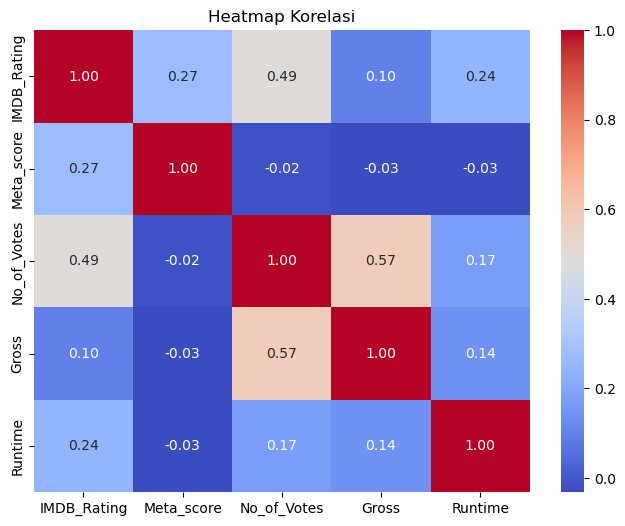

In [ ]:
#heatmap figures (using correlation pearson)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

#### Berdasarkan analisis korelasi visual heatmap, kesimpulan utamanya adalah:

### 1. Popularitas Film (Jumlah Vote):
### Memiliki hubungan kuat positif dengan pendapatan dan rating IMDB.Menunjukkan bahwa semakin banyak vote, semakin tinggi pendapatan dan rating film.


### 2. Hubungan Antarvariabel Lainnya:
### Lemah dan sebagian bersifat netral atau bahkan sedikit negatif. Durasi film, Meta Score, dan pendapatan memiliki korelasi yang tidak signifikan.Rating IMDB tidak selalu berbanding lurus dengan pendapatan atau Meta Score.

#### Sehingga, Popularitas film (jumlah vote) adalah faktor paling berpengaruh.
#### Faktor-faktor teknis seperti durasi atau skor kritik tidak terlalu menentukan kesuksesan film.
#### Penilaian penonton (vote dan rating) lebih penting daripada penilaian kritikus (Meta Score).

#### Intinya, popularitas dan penerimaan penonton lebih menentukan keberhasilan sebuah film dibandingkan faktor-faktor teknis atau penilaian kritikus.

In [ ]:
#import movie data (for genre)
file_path = r'C:\Users\ARUL\Documents\EDUCATIONAL SHIT\kuliah coy\sem 1\FP STATPROB - Copy\movies_data.csv'
data = pd.read_csv(file_path)

data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,Subgenre,Subgenre 1,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,NaN,NaN,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,Crime,Drama,NaN,9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,Action,Crime,Drama,9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,Crime,Drama,NaN,9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,Crime,Drama,NaN,9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [ ]:
#bersihkan value NaN
print(data.info())
data = data.dropna(subset=["Genre", "Gross", "Runtime", "No_of_Votes"])

#menghitung frekuensi setiap genre
genre_f = data['Genre'].value_counts()
print(genre_f)

#gross per genre
grossbygenre = data.groupby('Genre')['Gross'].sum().sort_values(ascending=False)
print(grossbygenre)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   int64  
 4   Genre          1000 non-null   object 
 5   Subgenre       895 non-null    object 
 6   Subgenre 1     646 non-null    object 
 7   IMDB_Rating    1000 non-null   float64
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int64(2), object(11)
memory usage: 125.1+ KB
None
Genre
Drama        234
Action   

#### Ini adalah data dengan jumlah berapa banyak Genre dalam Top 1000 IMDb dataset dan Penghasilan film dengan Genre tersebut (dalam USD)

C:\Users\ARUL\AppData\Local\Temp\ipykernel_13656\3770606621.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_f.index, y=genre_f.values, palette="viridis")


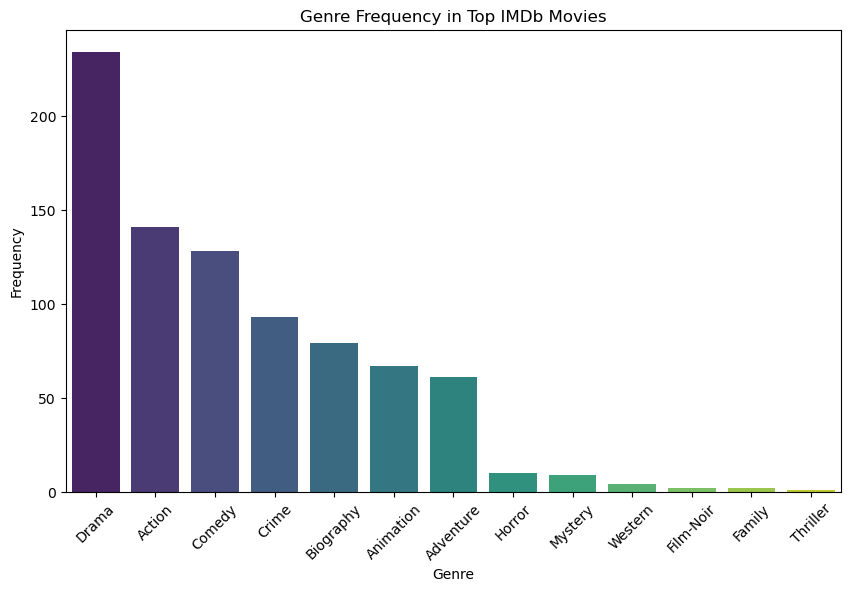

In [ ]:
#visual frekuensi genre
plt.figure(figsize=(10,6))
sns.barplot(x=genre_f.index, y=genre_f.values, palette="viridis")
plt.title("Genre Frequency in Top IMDb Movies")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

#### Ini adalah frekuensi Genre yang ada di Top 1000 IMDb Movies. 

#### Bisa disimpulkan bahwa Top 1000 IMDb Movies didominasi oleh genre Drama dengan 234 film. dan genre yang paling sedikit berada di Top 1000 IMDb adalah Thriller dengan 1 film.

C:\Users\ARUL\AppData\Local\Temp\ipykernel_13656\1361240594.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grossbygenre.index, y=grossbygenre.values, palette="magma")


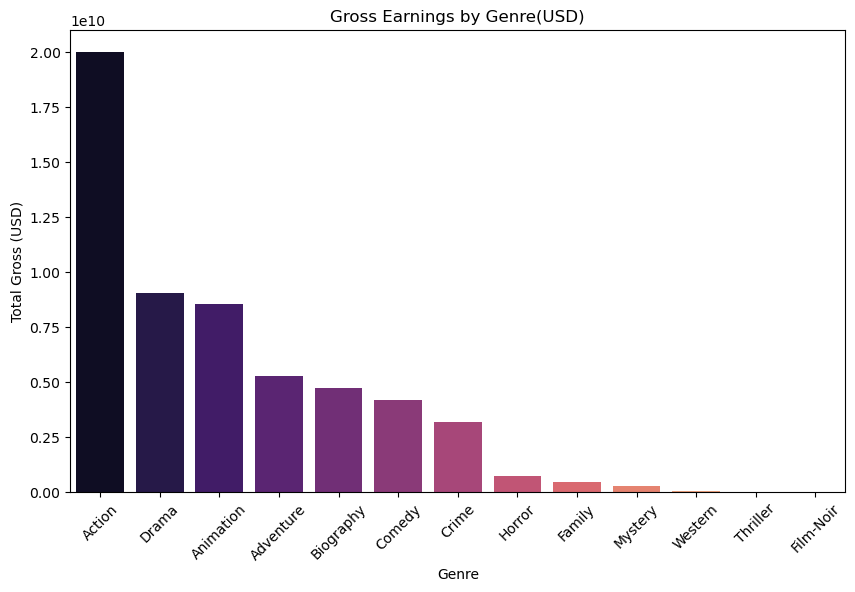

In [ ]:
#penghasilan film dari genre
plt.figure(figsize=(10,6))
sns.barplot(x=grossbygenre.index, y=grossbygenre.values, palette="magma")
plt.title("Gross Earnings by Genre(USD)")
plt.xlabel("Genre")
plt.ylabel("Total Gross (USD)")
plt.xticks(rotation=45)
plt.show()

#### Ini adalah visual untuk Pendapatan  Genre film yang didapat menggunakan mata uang USD. Genre dengan pendapatan tertinggi yaitu Action, meraup 2 0 Miliar USD dan genre yang memiliki pendapatan terendah dari Top 1000 IMDb dataset adalah genre film noir, thriller, western, dan  mystery, meraup dibawah 0.5 Miliar USD

In [ ]:
#label encoding untuk genre, agar bisa menghitung korelasi pearsonnya. Sehingga genre menjadi variabel numerik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Genre_encoded']= le.fit_transform(data['Genre'])

#menghitung korelasi dengan Genre Encoded
correlation_matrix = data[['Genre_encoded', 'Meta_score', 'Gross', 'No_of_Votes', 'Runtime']].corr()
genre_corr = correlation_matrix['Genre_encoded']

print("Korelasi Genre dengan variabel lainnya:")
print(genre_corr)

Korelasi Genre dengan variabel lainnya:
Genre_encoded    1.000000
Meta_score       0.103961
Gross           -0.324343
No_of_Votes     -0.187650
Runtime         -0.019327
Name: Genre_encoded, dtype: float64


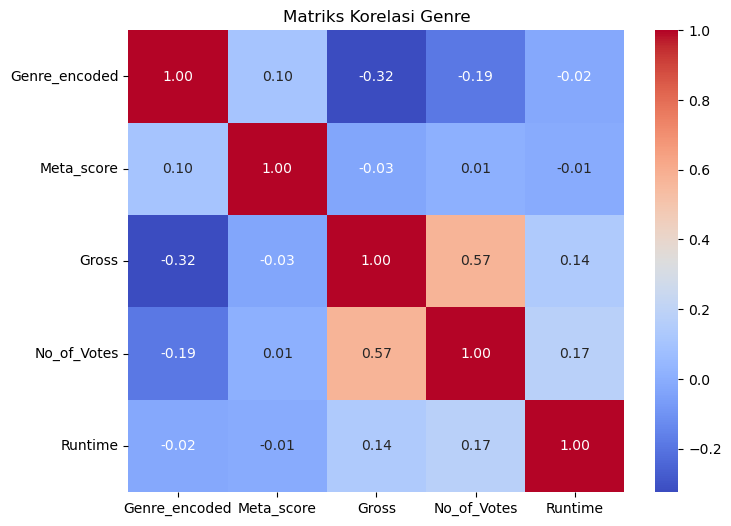

In [ ]:
#visualisasi heatmap genre 
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi Genre")
plt.show()

#### Dari visualisasi heatmap genre tersebut, bisa disimpulkan bahwa korelasi pearson tertinggi/memiliki hubungan yang kuat adalah Gross vs No_of_Votes. Sedangkan korelasi pearson terendah/memiliki hubungan yang lemah adalah Gross vs Genre_encoded.

### Kesimpulan yang bisa didapat adalah
### 1. Popularitas adalah kunci pendapatan, 
#### menurut hubungan kuat No_of_Votes vs Gross
### 2. Genre tidak berpengaruh secara langsung, 
#### menurut hubungan Gross (USD) vs Genre_encoded
### 3. Fokus pada kualitas dan promosi, 
#### untuk kesuksesan film, fokus harus diarahkan pada strategi pemasaran yang baik dan menghasilkan film yang menarik perhatian banyak orang, terlepas dari genre.

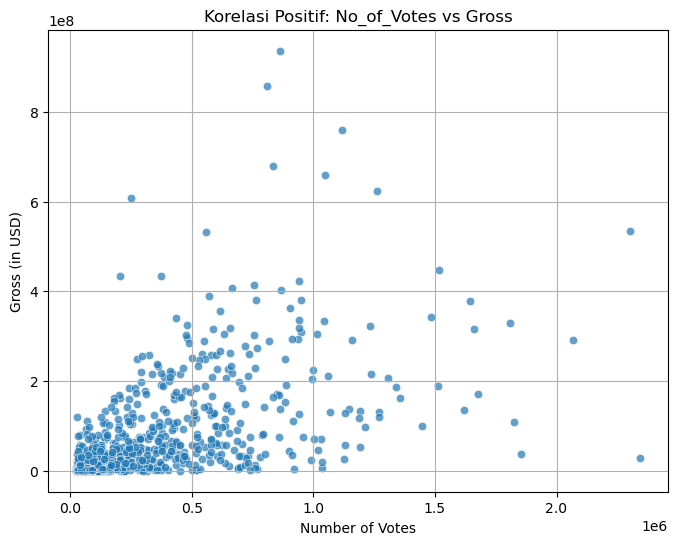

In [ ]:
#scatter plot untuk korelasi positif/kuat
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='No_of_Votes', y='Gross', alpha=0.7)
plt.title('Korelasi Positif: No_of_Votes vs Gross')
plt.xlabel('Number of Votes')
plt.ylabel('Gross (in USD)')
plt.grid(True)
plt.show()

#### Berdasarkan visualisasi scatter plot ini, menunjukkan bahwa titik data cenderung membentuk pola miring ke atas. Ini menunjukkan bahwa peningkatan satu variabel diikuti oleh peningkatan variabel lainnya, dengan kata lain menunjukkan hubungan korelasi positif/kuat.

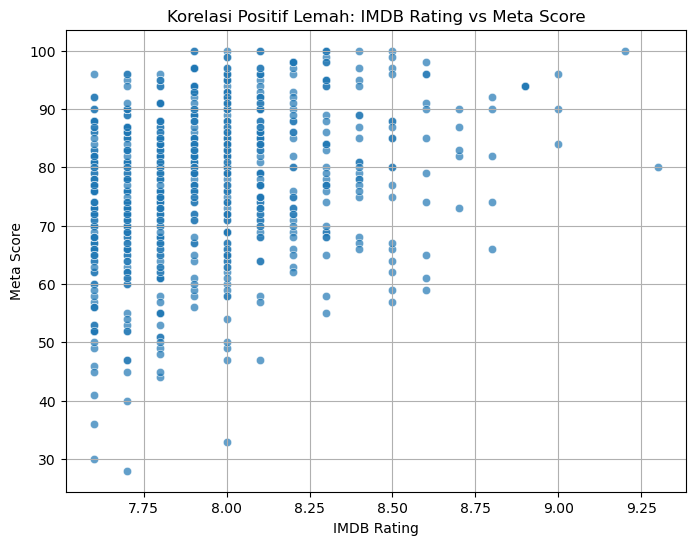

In [ ]:
#scatter plot untuk korelasi positif lemah
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='IMDB_Rating', y='Meta_score', alpha=0.7)
plt.title('Korelasi Positif Lemah: IMDB Rating vs Meta Score')
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.grid(True)
plt.show()

#### Berdasarkan visualisasi scatter plot ini, menunjukkan bahwa titik data cenderung membentuk pola miring ke bawah. Ini menunjukkan bahwa tidak ada hubungan yang signifikan namun ada sedikit tren positif, dengan kata lain menunjukkan hubungan korelasi positif lemah.

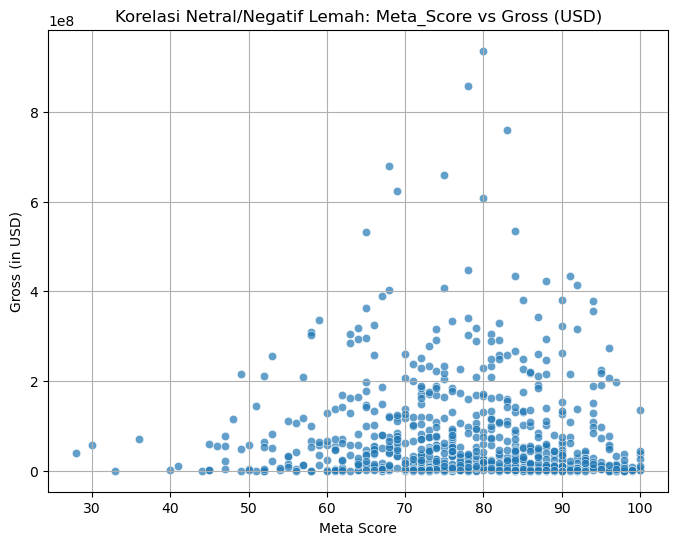

In [ ]:
#scatter plot untuk korelasi netral/negatif lemah
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Meta_score', y='Gross', alpha=0.7)
plt.title('Korelasi Netral/Negatif Lemah: Meta_Score vs Gross (USD)')
plt.xlabel('Meta Score')
plt.ylabel('Gross (in USD)')
plt.grid(True)
plt.show()

#### Berdasarkan visualisasi scatter plot ini, menunjukkan bahwa titik data cenderung acak tanpa pola jelas. Ini menunjukkan bahwa tidak ada hubungan yang signifikan ,dengan kata lain menunjukkan hubungan korelasi netral/negatif lemah.

## Inti dari analisis korelasi saya,
#### keberhasilan film lebih dipengaruhi oleh popularitas penonton (No_of_Votes) daripada oleh faktor-faktor teknis atau ulasan kritikus (Meta_score), menjadikan strategi untuk menarik perhatian audiens utama dan memperbesar jumalh vote sangat krusial dalam IMDb dataset. Meskipun begitu, genre film bukanlah faktor utama yang menentukan pendapatan (Gross), meskipun beberapa genre tertentu mungkin lebih menguntungkan secara komersial.

Analisis Korelasi,
menggunakan beberapa kolom yang relevan, seperti:
1. IMDB_Rating
2. Meta_score
3. No_of_Votes
4. Gross (pendapatan film)
5. Runtime

sebelum dianalisis, kolom Gross perlu diubah ke dalam format numerik agar dapat dianalisis dan mendapatkan nilai dari setiap kolom runtime.
Berikut adalah data yang sudah diformatkan dan dianaliskan korelasinya:

In [37]:
#analisis korelasi data (irul)
data['Gross'] = data['Gross'].replace(',', '', regex=True).replace('None', None).astype(float)
data['Runtime'] = data['Runtime'].str.extract('(\d+)').astype(float)

numeric_data = data[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']]
correlation_matrix = numeric_data.corr()

correlation_matrix

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\jonat\AppData\Local\Temp\ipykernel_4484\4252971347.py:3: SyntaxWarning: invalid escape sequence '\d'
  data['Runtime'] = data['Runtime'].str.extract('(\d+)').astype(float)


,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime
IMDB_Rating,1.000000,0.268531,0.494979,0.095923,0.243096
Meta_score,0.268531,1.000000,-0.018507,-0.030587,-0.031452
No_of_Votes,0.494979,-0.018507,1.000000,0.574393,0.173264
Gross,0.095923,-0.030587,0.574393,1.000000,0.139671
Runtime,0.243096,-0.031452,0.173264,0.139671,1.000000


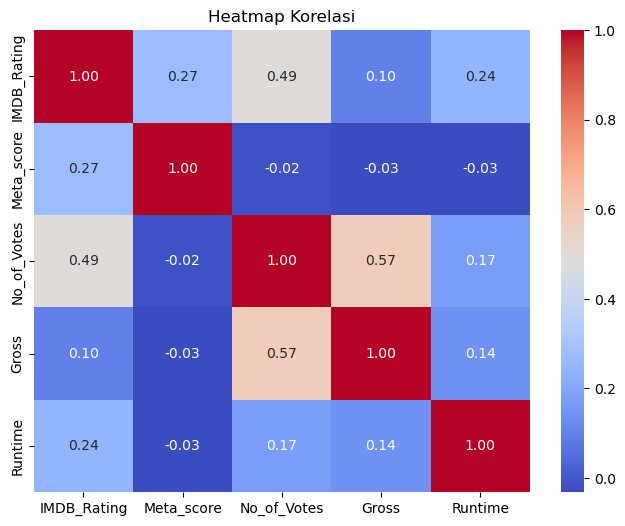

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

Dari visual Heatmap Korelasi ini menunjukkan bahwa
1. Korelasi antara No_of_Votes (angka vote) dengan Gross(angka penjualan) menunjukkan hubungan positif sedang.

2. Korelasi antara No_of_Votes (angka vote) dengan IMDB_Rating menunjukkan hubungan positif sedang.

3. Korelasi antara IMDB_Rating dengan 

<!-- zelig x clarissa -->
# F. Data Popularity Analysis
Below shall be the start of analyzing the data popularity.

## 1. Formulas

### Weighted Rating (WR):
  $$
  WR = \frac{v}{v + m} \times R + \frac{m}{v + m} \times C
  $$
  - $ R $: Average rating for the movie (mean IMDB rating)
  - $ v $: Number of votes for the movie
  - $ m $: Minimum votes required to be listed in the chart
  - $ C $: Mean vote across the whole report (mean IMDB rating for all movies)

### Popularity Score (PS):
  $$
  PS = \frac{R \times v \times G}{\max(G)}
  $$
  - $ R $: Average rating for the movie (mean IMDB rating)
  - $ v $: Number of votes for the movie
  - $ G $: Gross revenue for the movie
  - $\max(G)$: Maximum gross revenue in the dataset

### Composite Popularity Score (CPS):
  $$
  CPS = w_1 \times \text{Normalized Votes} + w_2 \times \text{Normalized Rating} + w_3 \times \text{Normalized Gross}
  $$
  - $ w_1, w_2, w_3 $: Weights assigned to each variable
  - $\text{Normalized Votes}$: Normalized number of votes
  - $\text{Normalized Rating}$: Normalized IMDB rating
  - $\text{Normalized Gross}$: Normalized gross revenue

### Pareto Principle (80/20 Rule):
  $$\text{Top } 20\% \text{ of items} \approx 80\% \text{ of the effect}$$
  
  - This principle states that roughly 80% of the effects come from 20% of the causes.

## 2. Analysis

### a. Import Dataset
For the first step, we need to reinitialize the dataset we're gonna use, since there's a better formatted dataset.

In [39]:
#analisis popularitas data (zelig x clarissa)
# overwriting data as dataframe from another dataset
# Get the current working directory
current_working_directory = os.getcwd()

# Define the relative path to the dataset
relative_path_to_dataset = 'data/movies_data.csv'

# Combine the current working directory with the relative path
full_path_to_dataset = os.path.join(current_working_directory, relative_path_to_dataset)

# Load the dataset into a pandas DataFrame
data = pd.read_csv(full_path_to_dataset)

# Print the first few rows of the dataset
data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,Subgenre,Subgenre 1,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,NaN,NaN,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,Crime,Drama,NaN,9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,Action,Crime,Drama,9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,Crime,Drama,NaN,9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,Crime,Drama,NaN,9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


### b. Pre-processing Dataset

Filtering out the dataset from the all the disruptive null values, i.e. the ones in the 'Gross' and the 'Number of Votes' columns

In [40]:
# zelig x clarissa
# print out the initial amount of rows and columns of the dataset
rows, columns = data.shape
print(f"Amount of initial rows: {rows}")
print(f"Amount of initial columns: {columns}")

# filter out null values from the 'Gross' and 'No_of_Votes' columns
data = data.dropna(subset=['Gross', 'No_of_Votes'])

# print out the amount of rows after filtering out the null values
rows, columns = data.shape
print(f"Amount of rows after filtering out null values: {rows}")
print(f"Amount of columns after filtering out null values: {columns}")

Amount of initial rows: 1000
Amount of initial columns: 16
Amount of rows after filtering out null values: 831
Amount of columns after filtering out null values: 16


In [41]:
# zelig x clarissa
# Calculate the mean IMDB rating across all movies (C)
C = data['IMDB_Rating'].mean()

# Determine the minimum number of votes required to be listed in the chart (m)
m = data['No_of_Votes'].quantile(0.90)  # The top 10% of movies by votes

# Filter out movies that have fewer votes than the minimum required
qualified_movies = data[data['No_of_Votes'] >= m]

# Calculate the weighted rating (WR) for each qualified movie
def weighted_rating(x, m=m, C=C):
    v = x['No_of_Votes']
    R = x['IMDB_Rating']
    return (v / (v + m) * R) + (m / (v + m) * C)

qualified_movies['Weighted_Rating'] = qualified_movies.apply(weighted_rating, axis=1)

# Calculate the popularity score (PS) for each qualified movie
max_gross = qualified_movies['Gross'].max()

def popularity_score(x, max_gross=max_gross):
    R = x['IMDB_Rating']
    v = x['No_of_Votes']
    G = x['Gross']
    return (R * v * G) / max_gross

qualified_movies['Popularity_Score'] = qualified_movies.apply(popularity_score, axis=1)

# Sort the movies by their weighted rating and popularity score
sorted_by_wr = qualified_movies.sort_values(by='Weighted_Rating', ascending=False)
sorted_by_ps = qualified_movies.sort_values(by='Popularity_Score', ascending=False)

# Display the top 10 movies by weighted rating and popularity score
print("Top 10 Movies by Weighted Rating:")
print(sorted_by_wr[['Series_Title', 'Weighted_Rating']].head(10))

print("\nTop 10 Movies by Popularity Score:")
print(sorted_by_ps[['Series_Title', 'Weighted_Rating']].head(10))

Top 10 Movies by Weighted Rating:
                                     Series_Title  Weighted_Rating
0                        The Shawshank Redemption         8.969477
1                                   The Godfather         8.800863
2                                 The Dark Knight         8.739408
6                                    Pulp Fiction         8.620606
5   The Lord of the Rings: The Return of the King         8.599253
3                          The Godfather: Part II         8.577408
8                                       Inception         8.571247
9                                      Fight Club         8.552655
11                                   Forrest Gump         8.548268
7                                Schindler's List         8.533752

Top 10 Movies by Popularity Score:
                                      Series_Title  Weighted_Rating
2                                  The Dark Knight         8.739408
623                                         Avatar       

C:\Users\jonat\AppData\Local\Temp\ipykernel_4484\195368037.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified_movies['Weighted_Rating'] = qualified_movies.apply(weighted_rating, axis=1)
C:\Users\jonat\AppData\Local\Temp\ipykernel_4484\195368037.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified_movies['Popularity_Score'] = qualified_movies.apply(popularity_score, axis=1)


In [42]:
# zelig x clarissa

# Segment analysis
print("\nSegment Analysis:")
critically_acclaimed = sorted_by_wr[sorted_by_wr['Weighted_Rating'] > 8]

commercial_hits = sorted_by_ps[sorted_by_ps['Popularity_Score'] > sorted_by_ps['Popularity_Score'].quantile(0.75)]

hidden_gems = sorted_by_wr[(sorted_by_wr['Weighted_Rating'] > 8) & (sorted_by_ps['Popularity_Score'] < sorted_by_ps['Popularity_Score'].quantile(0.25))]

print("Critically Acclaimed Movies:")
print(critically_acclaimed[['Series_Title', 'Weighted_Rating']])

print("\nCommercial Hits:")
print(commercial_hits[['Series_Title', 'Popularity_Score']])

print("\nHidden Gems:")
print(hidden_gems[['Series_Title', 'Weighted_Rating', 'Popularity_Score']])


Segment Analysis:
Critically Acclaimed Movies:
                                      Series_Title  Weighted_Rating
0                         The Shawshank Redemption         8.969477
1                                    The Godfather         8.800863
2                                  The Dark Knight         8.739408
6                                     Pulp Fiction         8.620606
5    The Lord of the Rings: The Return of the King         8.599253
..                                             ...              ...
210                                      Gone Girl         8.028308
232                         No Country for Old Men         8.028185
243                            Catch Me If You Can         8.027098
245                                 Monsters, Inc.         8.026294
226   Harry Potter and the Deathly Hallows: Part 2         8.023824

[71 rows x 2 columns]

Commercial Hits:
                                          Series_Title  Popularity_Score
2                     

C:\Users\jonat\AppData\Local\Temp\ipykernel_4484\1344071522.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hidden_gems = sorted_by_wr[(sorted_by_wr['Weighted_Rating'] > 8) & (sorted_by_ps['Popularity_Score'] < sorted_by_ps['Popularity_Score'].quantile(0.25))]


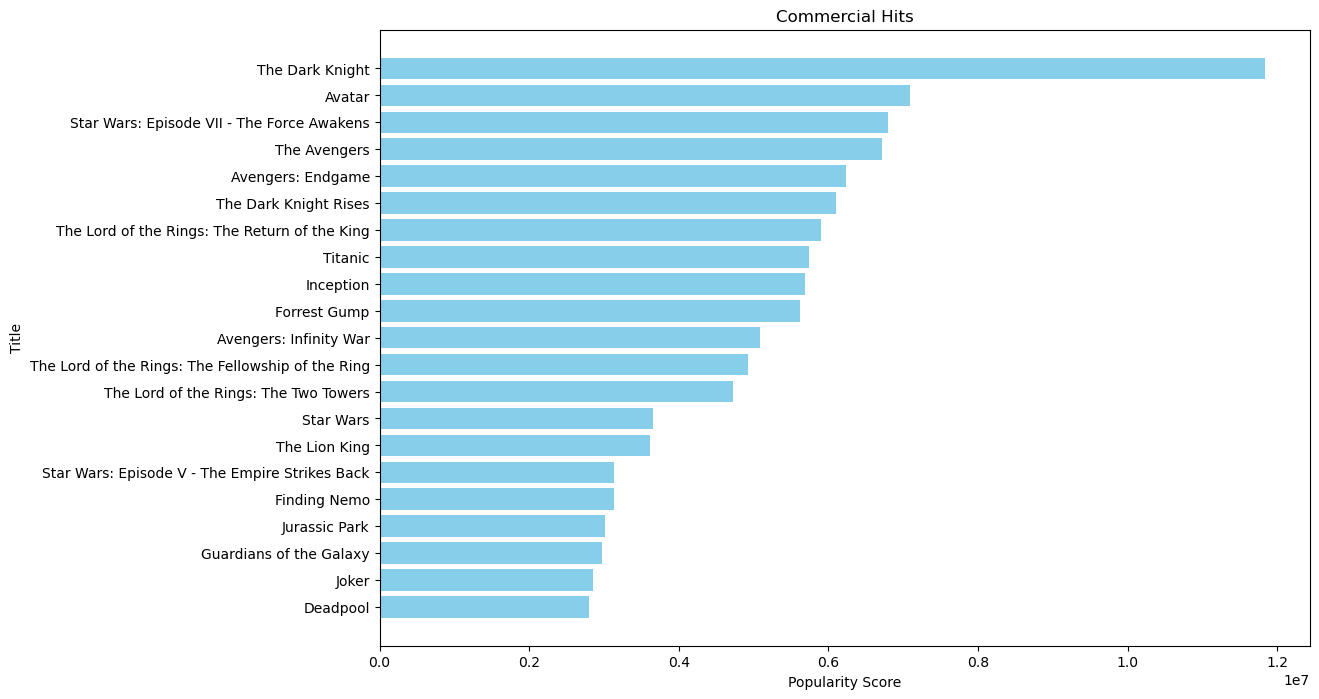

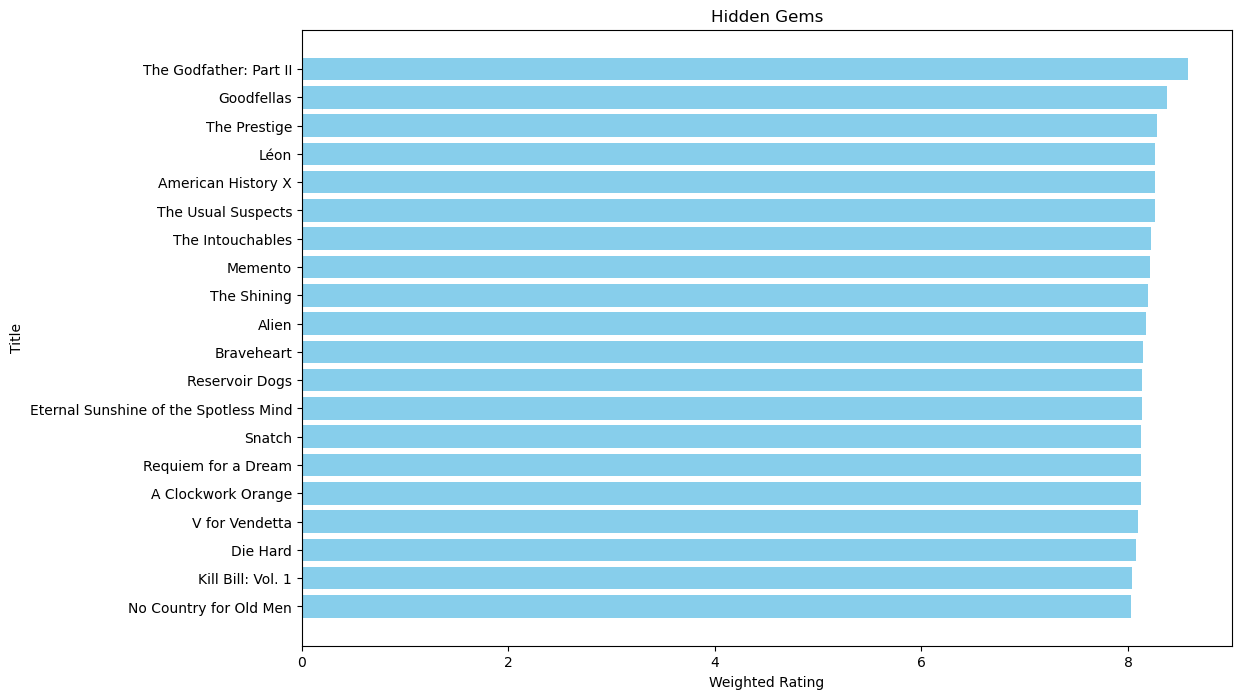

In [43]:
# Plot the bar graph for Commercial Hits
plt.figure(figsize=(12, 8))
plt.barh(commercial_hits['Series_Title'], commercial_hits['Popularity_Score'], color='skyblue')
plt.xlabel('Popularity Score')
plt.ylabel('Title')
plt.title('Commercial Hits')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.show()

# Plot the bar graph for Hidden Gems
plt.figure(figsize=(12, 8))
plt.barh(hidden_gems['Series_Title'], hidden_gems['Weighted_Rating'], color='skyblue')
plt.xlabel('Weighted Rating')
plt.ylabel('Title')
plt.title('Hidden Gems')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top
plt.show()

### Analysis
Above is the top movies in the dataset that has been sorted in the order of descending, from the highest to lowest. The commercial hits are the one that is sorted by the highest PS value. Meanwhile the hidden gems are a combined result of filtering out the ones with low PS value, but high WR value (meaning it has a good rating, but not succesfully commercialized).

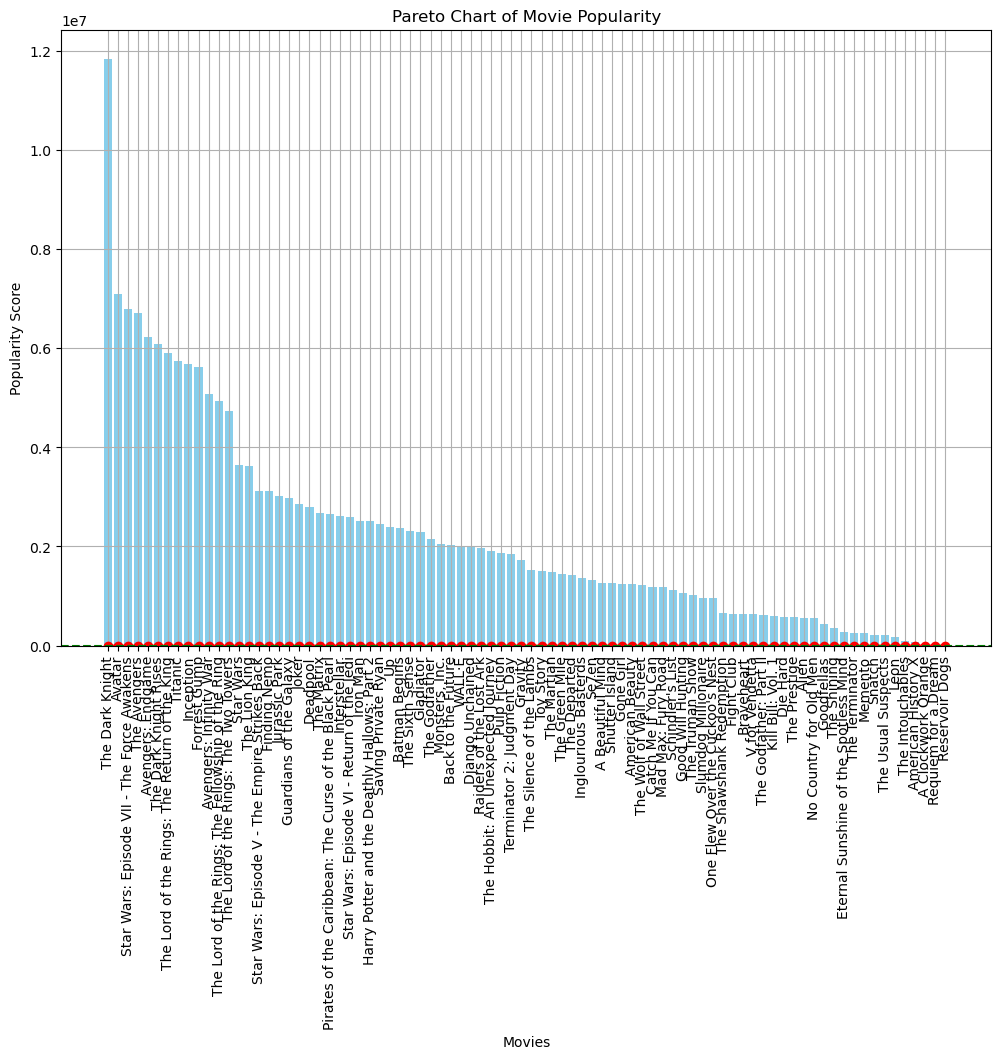

Top 20% of Movies that Contribute to 80% of the Total Popularity:
                                          Series_Title  Popularity_Score  \
2                                      The Dark Knight      1.183685e+07   
623                                             Avatar      7.086707e+06   
477         Star Wars: Episode VII - The Force Awakens      6.800502e+06   
357                                       The Avengers      6.711786e+06   
59                                   Avengers: Endgame      6.234954e+06   
63                               The Dark Knight Rises      6.094070e+06   
5        The Lord of the Rings: The Return of the King      5.897872e+06   
652                                            Titanic      5.743545e+06   
8                                            Inception      5.681826e+06   
11                                        Forrest Gump      5.613542e+06   
60                              Avengers: Infinity War      5.079985e+06   
10   The Lord of the R

In [44]:
# Calculate the cumulative popularity score
sorted_by_ps['Cumulative_Popularity'] = sorted_by_ps['Popularity_Score'].cumsum()

# Calculate the total popularity score
total_popularity = sorted_by_ps['Popularity_Score'].sum()

# Calculate the cumulative percentage of the total popularity score
sorted_by_ps['Cumulative_Percentage'] = sorted_by_ps['Cumulative_Popularity'] / total_popularity * 100

# Identify the top 20% of movies that contribute to 80% of the total popularity
top_20_percent_movies = sorted_by_ps[sorted_by_ps['Cumulative_Percentage'] <= 80]

# Plot the Pareto chart
plt.figure(figsize=(12, 8))
plt.bar(sorted_by_ps['Series_Title'], sorted_by_ps['Popularity_Score'], color='skyblue')
plt.plot(sorted_by_ps['Series_Title'], sorted_by_ps['Cumulative_Percentage'], color='red', marker='o')
plt.axhline(y=80, color='green', linestyle='--')
plt.xlabel('Movies')
plt.ylabel('Popularity Score')
plt.title('Pareto Chart of Movie Popularity')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Display the top 20% of movies
print("Top 20% of Movies that Contribute to 80% of the Total Popularity:")
print(top_20_percent_movies[['Series_Title', 'Popularity_Score', 'Cumulative_Percentage']])

### Analysis
This is the result of Patero's theory where it shows the top 20% movies with the highest PS value. With Patero's theory as a basis, this means these movies are the one that provides 80% of the total popularities of all of the movies in the dataset.

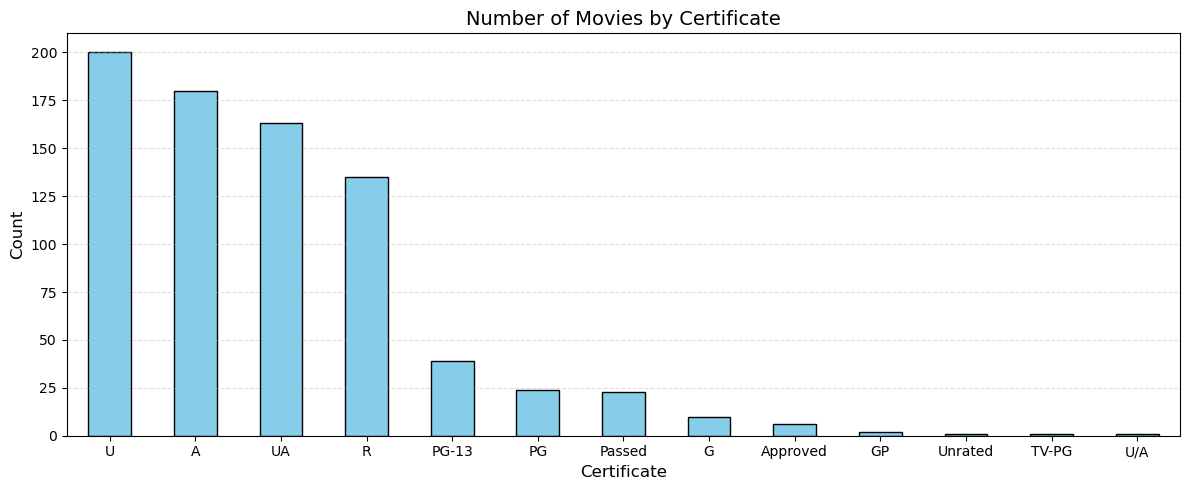

In [45]:
#analisis popularitas data 

# Group the data by "Certificate" and count the occurrences
certificate_counts = data["Certificate"].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 5))
certificate_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Add labels and title
plt.title("Number of Movies by Certificate", fontsize=14)
plt.xlabel("Certificate", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Show the plot
plt.tight_layout()
plt.show()


Kode di atas menganalisis popularitas film berdasarkan sertifikat atau klasifikasi umur (seperti G, PG, PG-13, R, dan sebagainya) yang diterapkan pada dataset. Langkahnya adalah dengan mengelompokkan Data Berdasarkan Sertifikat kemudian membuat visualisasi dalam bentuk diagram batang. Kemudian hasil diagram disesuaikan dengan pengaturan visualisasinya (ukuran gambar, warna dan gaya, judul, dll).


#### **A. Analisis Grafik**
Grafik yang ditampilkan adalah jumlah film berdasarkan sertifikat. Berikut beberapa poin penting yang dapat diambil dari grafik ini:


**1. Kategori Sertifikat Populer:**
Sertifikat "U" memiliki jumlah film tertinggi, menandakan bahwa banyak film ditujukan untuk semua umur (Universal). Diikuti oleh sertifikat "A" dan "UA," yang menunjukkan film untuk kategori audiens tertentu.

**2. Sertifikat Kurang Populer:**
Sertifikat seperti "TV-PG," "GP," "TV-14," dan "Unrated" memiliki jumlah film yang sangat kecil. Hal ini menunjukkan bahwa film dengan klasifikasi tersebut jarang ditemukan atau diproduksi dalam dataset.



#### **B. Analisis Popularitas Berdasarkan Kode:**

**1. Interpretasi Hasil:** 
Kategori sertifikat dengan jumlah tertinggi menunjukkan bahwa film dalam kategori tersebut lebih populer atau lebih sering diproduksi. Sebaliknya, kategori dengan jumlah terendah mungkin kurang populer, memiliki audiens yang lebih spesifik, atau kurang diproduksi.

**2. Implementasi:**
Informasi ini bisa digunakan untuk memahami tren dalam industri film, seperti jenis audiens yang paling sering ditargetkan oleh produsen film. Informasi ini bisa juga membantu perusahaan produksi atau distributor film dalam pengambilan keputusan strategis terkait kategori sertifikat mana yang harus difokuskan untuk pembuatan film agar film tersebut lebih populer.


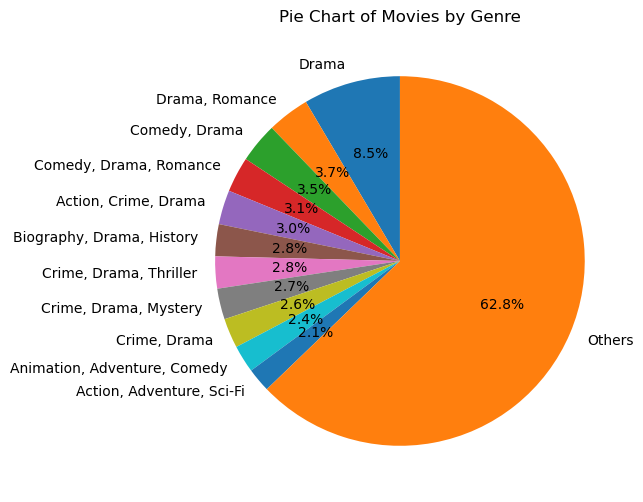

In [47]:
data = pd.read_csv('data/imdb_top_1000.csv') 
# Calculate cumulative percentages
genre_counts_large = data["Genre"].value_counts()

threshold = 0.02 # Categories representing less than 5% will be grouped
total = genre_counts_large.sum()
other_count = genre_counts_large[genre_counts_large / total < threshold].sum()
filtered_counts = genre_counts_large[genre_counts_large / total >= threshold]
filtered_counts["Others"] = other_count

# For Pareto Chart: Sort and calculate cumulative percentage
filtered_counts_sorted = filtered_counts.sort_values(ascending=False)
cumulative_percentage_large = filtered_counts_sorted.cumsum() / filtered_counts_sorted.sum() * 100

# Plotting
plt.figure(figsize=(16, 6))

# Subplot 1: Pie Chart
plt.subplot(1, 2, 1)
filtered_counts.plot(
    kind="pie", autopct="%1.1f%%", colors=plt.cm.tab10.colors, startangle=90, legend=False
)
plt.title("Pie Chart of Movies by Genre")
plt.ylabel("")


# Show the plots
plt.show()

## G. Export to PDF

In [83]:
# download if needed
%pip install nbconvert

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
!jupyter nbconvert --to pdf FP_Akhir.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'FP_Akhir.ipynb' matched no files
